In [1]:
#import 
import pandas as pd
import numpy as np
import bz2
import json
import glob
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import math
import gc

# Exploratory data analysis

Since the dataset we are working with is very large, we use this notebook to explore the whole dataset. The other datasets use samples taken from the entire dataset.

## PART 1: Year by year exploration

## 2020 exploration

In [28]:
dfmerged = pd.read_csv('UniqueSpeakers\speakerfilter\merged_data_2020.csv.gzip', compression='gzip')
dfmerged.drop('Unnamed: 0_x', axis=1, inplace=True)
dfmerged.drop('Unnamed: 0_y', axis=1, inplace=True)
dfmerged

,qid,quoteID,quotation,speaker,prob,sentence_count,._per_sentence,",_per_sentence",!_per_sentence,?_per_sentence,...,self_ratio,union_ratio,other_ratio,sentiment,date_of_birth,nationality,gender,occupation,academic_degree,religion
0,Q1000053,2020-01-30-115748,We stress that any attempts to fuel the confli...,Vasily Nebenzya,0.9429,1,0.0,1.0,0.0,0.0,...,-1.000000,1.0,-1.000000,-0.368,1962.0,Russia,Male,Politics,NaN,NaN
1,Q1000053,2020-01-30-110614,We consistently send signals to abandon aggres...,Vasily Nebenzya,0.5209,1,1.0,1.0,0.0,0.0,...,-1.000000,1.0,-1.000000,0.024,1962.0,Russia,Male,Politics,NaN,NaN
2,Q1000053,2020-02-26-086429,We understand the concerns of a number of non-...,Vasily Nebenzya,0.9361,1,0.0,2.0,0.0,0.0,...,-1.000000,1.0,-1.000000,0.064,1962.0,Russia,Male,Politics,NaN,NaN
3,Q1000053,2020-02-25-076403,"We cannot agree to that kind of approach,",Vasily Nebenzya,0.9680,1,0.0,1.0,0.0,0.0,...,-1.000000,1.0,-1.000000,-0.232,1962.0,Russia,Male,Politics,NaN,NaN
4,Q1000053,2020-01-09-098083,violation and noncompliance of international law.,Vasily Nebenzya,0.9364,1,1.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,-0.390,1962.0,Russia,Male,Politics,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2241367,Q999711,2020-03-19-074326,This is his home racetrack and that also makes...,Steve Fitzsimmons,0.7526,2,1.0,0.0,0.0,0.0,...,0.333333,-1.0,-0.333333,0.204,1976.0,Australia,Male,Sports,NaN,NaN
2241368,Q999711,2020-02-27-066900,The Hanover Bentinck and Brant Agricultural So...,Steve Fitzsimmons,0.5578,2,1.0,1.5,0.0,0.0,...,-1.000000,1.0,-1.000000,0.261,1976.0,Australia,Male,Sports,NaN,NaN
2241369,Q999711,2020-03-05-074250,This is a very unique opportunity for me. My f...,Steve Fitzsimmons,0.7475,1,1.0,1.0,0.0,0.0,...,1.000000,-1.0,-1.000000,0.088,1976.0,Australia,Male,Sports,NaN,NaN
2241370,Q999711,2020-02-27-077480,This is a very unique opportunity for me. My f...,Steve Fitzsimmons,0.6221,2,1.0,1.0,0.0,0.0,...,1.000000,-1.0,-1.000000,0.108,1976.0,Australia,Male,Sports,NaN,NaN


In [9]:
len(dfmerged)

2241372

### Gender

Text(0, 0.5, 'Gender frequency')

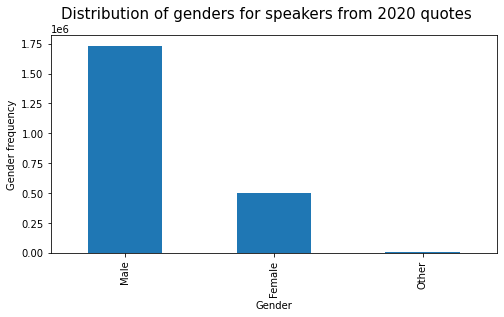

In [10]:
fig, ax = plt.subplots(figsize=(8,4))
ax = dfmerged['gender'].value_counts().plot.bar(x='gender')
fig.suptitle("Distribution of genders for speakers from 2020 quotes", fontsize = 15)
ax.set_xlabel('Gender')
ax.set_ylabel('Gender frequency')

In [11]:
dfmerged['gender'].value_counts()

Male      1734417
Female     499626
Other        7329
Name: gender, dtype: int64

In [12]:
dfgender2020 = dfmerged['gender'].value_counts().rename_axis('unique_values').to_frame('counts')
print (dfgender2020)

                counts
unique_values         
Male           1734417
Female          499626
Other             7329


### Religion

Text(0, 0.5, 'Religion frequency')

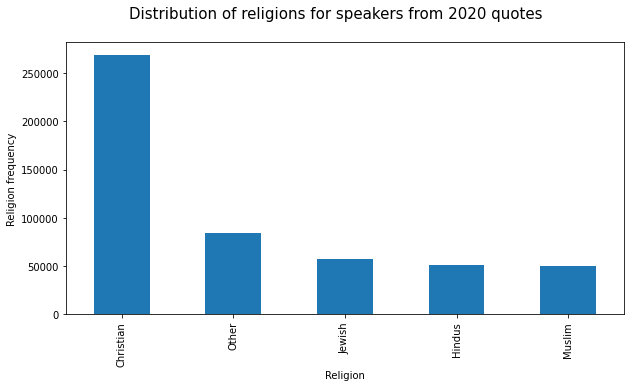

In [13]:
fig, ax = plt.subplots(figsize=(10,5))
ax = dfmerged['religion'].value_counts().plot.bar(x='religion')
fig.suptitle("Distribution of religions for speakers from 2020 quotes", fontsize = 15)
ax.set_xlabel('Religion')
ax.set_ylabel('Religion frequency')

In [14]:
dfmerged['religion'].value_counts()

Christian    268632
Other         84529
Jewish        57125
Hindus        51083
Muslim        49463
Name: religion, dtype: int64

In [15]:
dfreligion2020 = dfmerged['religion'].value_counts().rename_axis('unique_values').to_frame('counts')
print (dfreligion2020)

               counts
unique_values        
Christian      268632
Other           84529
Jewish          57125
Hindus          51083
Muslim          49463


### Occupation

Text(0, 0.5, 'Occupation frequency')

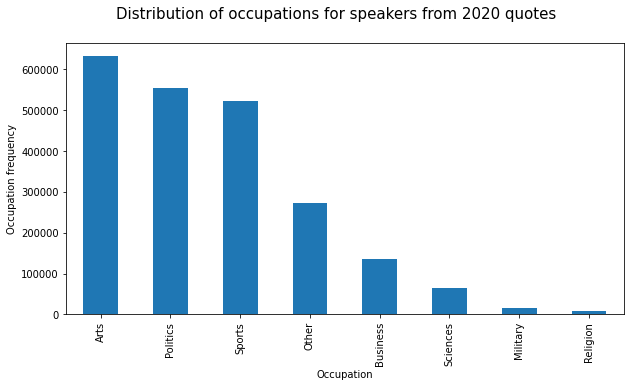

In [16]:
fig, ax = plt.subplots(figsize=(10,5))
ax = dfmerged['occupation'].value_counts().plot.bar(x='occupation')
fig.suptitle("Distribution of occupations for speakers from 2020 quotes", fontsize = 15)
ax.set_xlabel('Occupation')
ax.set_ylabel('Occupation frequency')

In [17]:
dfmerged['occupation'].value_counts()

Arts        633907
Politics    554912
Sports      523639
Other       271723
Business    135161
Sciences     63903
Military     16066
Religion      9008
Name: occupation, dtype: int64

In [18]:
dfoccupation2020 = dfmerged['occupation'].value_counts().rename_axis('unique_values').to_frame('counts')
print (dfoccupation2020)

               counts
unique_values        
Arts           633907
Politics       554912
Sports         523639
Other          271723
Business       135161
Sciences        63903
Military        16066
Religion         9008


### Nationality

Text(0, 0.5, 'Nationality frequency')

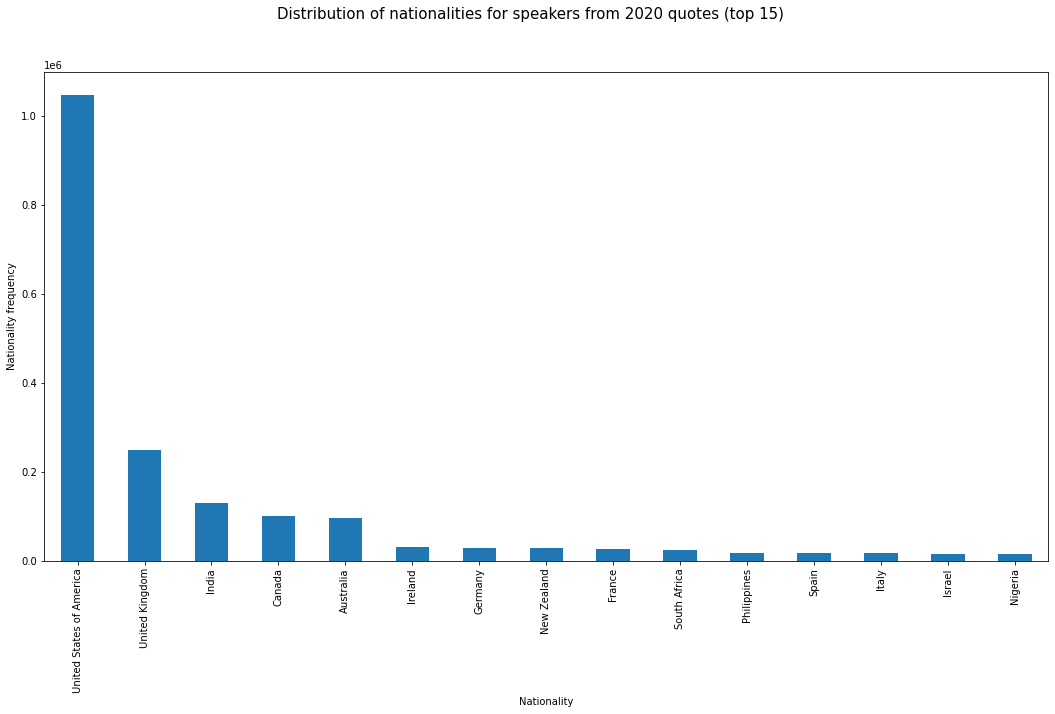

In [19]:
fig, ax = plt.subplots(figsize=(18,9))
ax = dfmerged['nationality'].value_counts().head(15).plot.bar(x='nationality')
fig.suptitle("Distribution of nationalities for speakers from 2020 quotes (top 15)", fontsize = 15)
ax.set_xlabel('Nationality')
ax.set_ylabel('Nationality frequency')

In [20]:
dfmerged['nationality'].value_counts().head(15)

United States of America    1046442
United Kingdom               249156
India                        129500
Canada                       101198
Australia                     96935
Ireland                       32252
Germany                       29742
New Zealand                   28223
France                        26880
South Africa                  24847
Philippines                   19062
Spain                         18188
Italy                         17604
Israel                        16196
Nigeria                       15197
Name: nationality, dtype: int64

In [175]:
dfnationality2020 = dfmerged['nationality'].value_counts().rename_axis('unique_values').to_frame('counts')
print (dfnationality2020)

                           counts
unique_values                    
United States of America  1046442
United Kingdom             249156
India                      129500
Canada                     101198
Australia                   96935
...                           ...
statelessness                   1
Republic of Abkhazia            1
Kingdom of Bulgaria             1
São Tomé and Príncipe           1
United Arab Republic            1

[306 rows x 1 columns]


### Academic degree

Text(0, 0.5, 'Academic degree frequency')

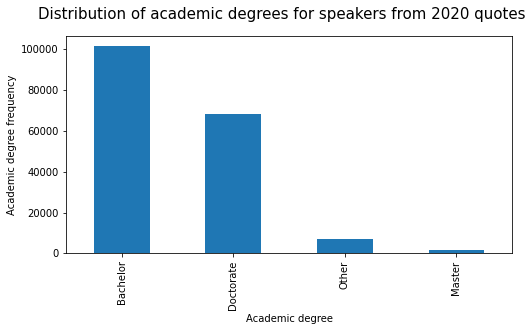

In [22]:
fig, ax = plt.subplots(figsize=(8,4))
ax = dfmerged['academic_degree'].value_counts().plot.bar(x='academic_degree')
fig.suptitle("Distribution of academic degrees for speakers from 2020 quotes", fontsize = 15)
ax.set_xlabel('Academic degree')
ax.set_ylabel('Academic degree frequency')

In [23]:
dfmerged['academic_degree'].value_counts()

Bachelor     101491
Doctorate     68363
Other          6887
Master         1804
Name: academic_degree, dtype: int64

In [24]:
dfacademicdegree2020 = dfmerged['academic_degree'].value_counts().rename_axis('unique_values').to_frame('counts')
print (dfacademicdegree2020)

               counts
unique_values        
Bachelor       101491
Doctorate       68363
Other            6887
Master           1804


### Date of birth

Text(0, 0.5, 'Year frequency')

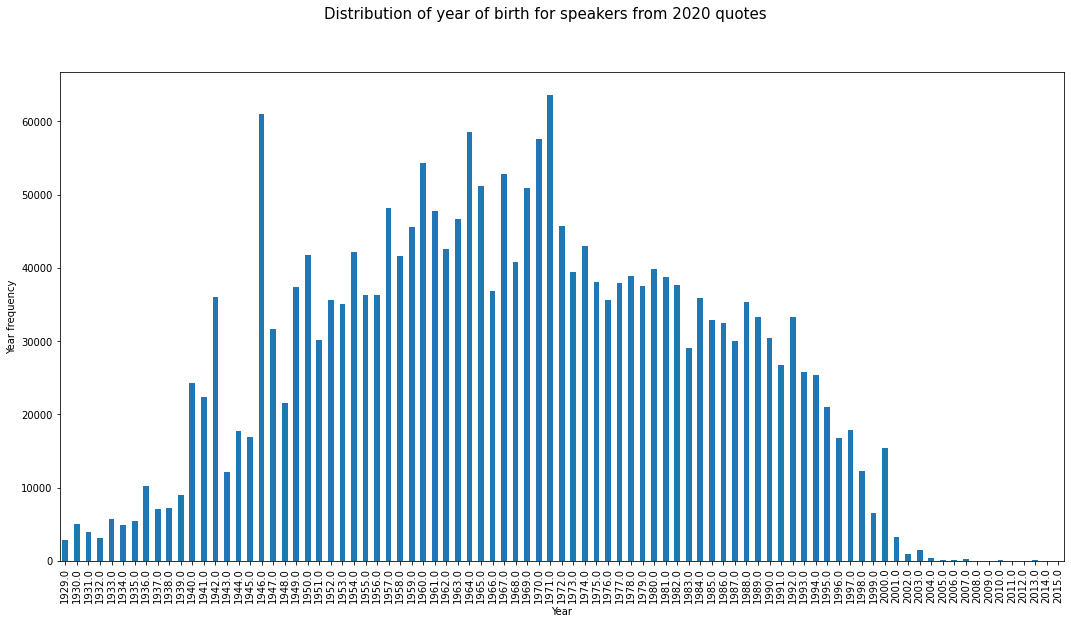

In [25]:
fig, ax = plt.subplots(figsize=(18,9))
ax = dfmerged['date_of_birth'].sort_values().value_counts(sort=False).plot.bar(x='date_of_birth')
fig.suptitle("Distribution of year of birth for speakers from 2020 quotes", fontsize = 15)
ax.set_xlabel('Year')
ax.set_ylabel('Year frequency')

In [26]:
dfmerged['date_of_birth'].value_counts().head(15)

1971.0    63626
1946.0    60947
1964.0    58564
1970.0    57617
1960.0    54328
1967.0    52763
1965.0    51145
1969.0    50843
1957.0    48132
1961.0    47802
1963.0    46700
1972.0    45678
1959.0    45558
1974.0    42968
1962.0    42580
Name: date_of_birth, dtype: int64

In [176]:
dfyears2020 = dfmerged['date_of_birth'].value_counts().rename_axis('unique_values').to_frame('counts')
print (dfyears2020)

               counts
unique_values        
1971.0          63626
1946.0          60947
1964.0          58564
1970.0          57617
1960.0          54328
...               ...
2009.0             28
2011.0             22
2015.0             17
2008.0             15
2014.0             10

[87 rows x 1 columns]


In [29]:
dfmerged = dfmerged[~dfmerged.qid.duplicated(keep='first')]
dfmerged

,qid,quoteID,quotation,speaker,prob,sentence_count,._per_sentence,",_per_sentence",!_per_sentence,?_per_sentence,...,self_ratio,union_ratio,other_ratio,sentiment,date_of_birth,nationality,gender,occupation,academic_degree,religion
0,Q1000053,2020-01-30-115748,We stress that any attempts to fuel the confli...,Vasily Nebenzya,0.9429,1,0.0,1.0,0.0,0.0,...,-1.0,1.000000,-1.000000,-0.368,1962.0,Russia,Male,Politics,NaN,NaN
27,Q1000491,2020-04-01-051196,Stade Roland Garros had a shameful wartime cha...,Bud Collins,0.9444,10,1.0,2.0,0.0,0.0,...,-1.0,-1.000000,1.000000,0.045,1929.0,United States of America,Male,Sports,NaN,NaN
34,Q1000592,2020-02-11-011721,But for an 18-month period he didn't change. H...,Tyson Fury,0.7418,2,1.0,0.0,0.0,0.0,...,-1.0,-1.000000,1.000000,-0.293,1988.0,United Kingdom,Male,Other,NaN,Other
1825,Q1000678,2020-03-08-035948,This is the first opportunity we've had to bri...,Randy McKay,0.8335,1,0.0,2.0,0.0,0.0,...,-1.0,-0.333333,0.333333,0.097,1967.0,Canada,Male,Sports,NaN,NaN
1827,Q1000682,2020-03-23-001236,a prison emergency to guarantee health conditi...,Fernando Carrillo,0.9330,1,1.0,1.0,0.0,0.0,...,0.0,0.000000,0.000000,-0.231,1965.0,Venezuela,Male,Arts,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2241269,Q999332,2020-01-15-024813,`Here's the thing. What are the two biggest mo...,Buck Henry,0.8814,4,0.5,0.0,0.0,0.5,...,0.0,0.000000,0.000000,0.000,1930.0,United States of America,Male,Arts,NaN,NaN
2241344,Q999577,2020-01-16-101326,We have all the underlying technology patented...,David Eagleman,0.5474,1,1.0,4.0,0.0,0.0,...,-1.0,1.000000,-1.000000,0.182,1971.0,United States of America,Male,Sciences,NaN,NaN
2241351,Q999608,2020-02-10-096815,We knew coming in that this match was going to...,Gabriel Caballero,0.9516,4,1.0,1.5,0.0,0.0,...,-1.0,0.666667,-0.666667,0.069,1971.0,Argentina,Male,Sports,NaN,NaN
2241355,Q999706,2020-02-01-035548,One of our strengths was the church business b...,Vincent Brady,0.7798,2,1.0,0.0,0.0,0.0,...,-1.0,-1.000000,1.000000,-0.042,1936.0,Ireland,Male,Politics,NaN,NaN


In [26]:
# remove from memory to load next year data
del dfquotes2020
del dfmerged

## 2015 exploration

In [32]:
dfmerged = pd.read_csv('UniqueSpeakers\speakerfilter\merged_data_2015.csv.gzip', compression='gzip')
dfmerged.drop('Unnamed: 0', axis=1, inplace=True)
len(dfmerged)

8648223

### Gender

Text(0, 0.5, 'Gender frequency')

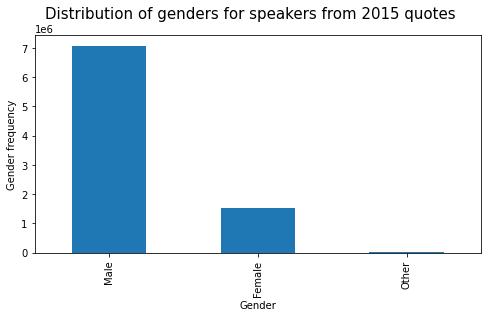

In [35]:
fig, ax = plt.subplots(figsize=(8,4))
ax = dfmerged['gender'].value_counts().plot.bar(x='gender')
fig.suptitle("Distribution of genders for speakers from 2015 quotes", fontsize = 15)
ax.set_xlabel('Gender')
ax.set_ylabel('Gender frequency')

In [36]:
dfmerged['gender'].value_counts()

Male      7079274
Female    1539028
Other       29921
Name: gender, dtype: int64

In [37]:
dfgender2015 = dfmerged['gender'].value_counts().rename_axis('unique_values').to_frame('counts')
print (dfgender2015)

                counts
unique_values         
Male           7079274
Female         1539028
Other            29921


### Religion

Text(0, 0.5, 'Religion frequency')

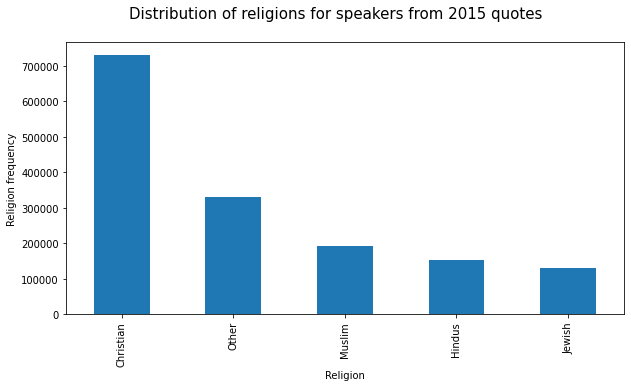

In [38]:
fig, ax = plt.subplots(figsize=(10,5))
ax = dfmerged['religion'].value_counts().plot.bar(x='religion')
fig.suptitle("Distribution of religions for speakers from 2015 quotes", fontsize = 15)
ax.set_xlabel('Religion')
ax.set_ylabel('Religion frequency')

In [39]:
dfmerged['religion'].value_counts()

Christian    729950
Other        330418
Muslim       190577
Hindus       151497
Jewish       131240
Name: religion, dtype: int64

In [40]:
dfreligion2015 = dfmerged['religion'].value_counts().rename_axis('unique_values').to_frame('counts')
print (dfreligion2015)

               counts
unique_values        
Christian      729950
Other          330418
Muslim         190577
Hindus         151497
Jewish         131240


### Occupation

Text(0, 0.5, 'Occupation frequency')

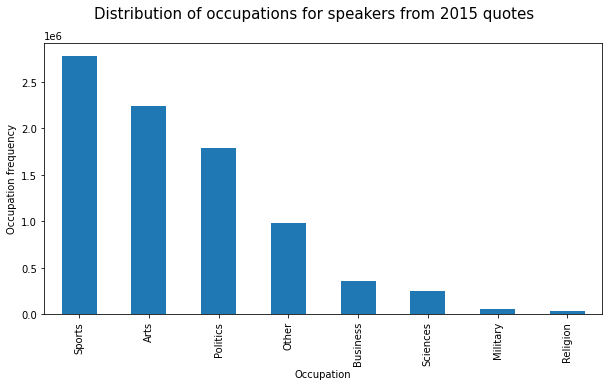

In [41]:
fig, ax = plt.subplots(figsize=(10,5))
ax = dfmerged['occupation'].value_counts().plot.bar(x='occupation')
fig.suptitle("Distribution of occupations for speakers from 2015 quotes", fontsize = 15)
ax.set_xlabel('Occupation')
ax.set_ylabel('Occupation frequency')

In [42]:
dfmerged['occupation'].value_counts()

Sports      2783838
Arts        2242743
Politics    1792753
Other        984710
Business     359967
Sciences     255381
Military      53255
Religion      37150
Name: occupation, dtype: int64

In [43]:
dfoccupation2015 = dfmerged['occupation'].value_counts().rename_axis('unique_values').to_frame('counts')
print (dfoccupation2015)

                counts
unique_values         
Sports         2783838
Arts           2242743
Politics       1792753
Other           984710
Business        359967
Sciences        255381
Military         53255
Religion         37150


### Nationality

Text(0, 0.5, 'Nationality frequency')

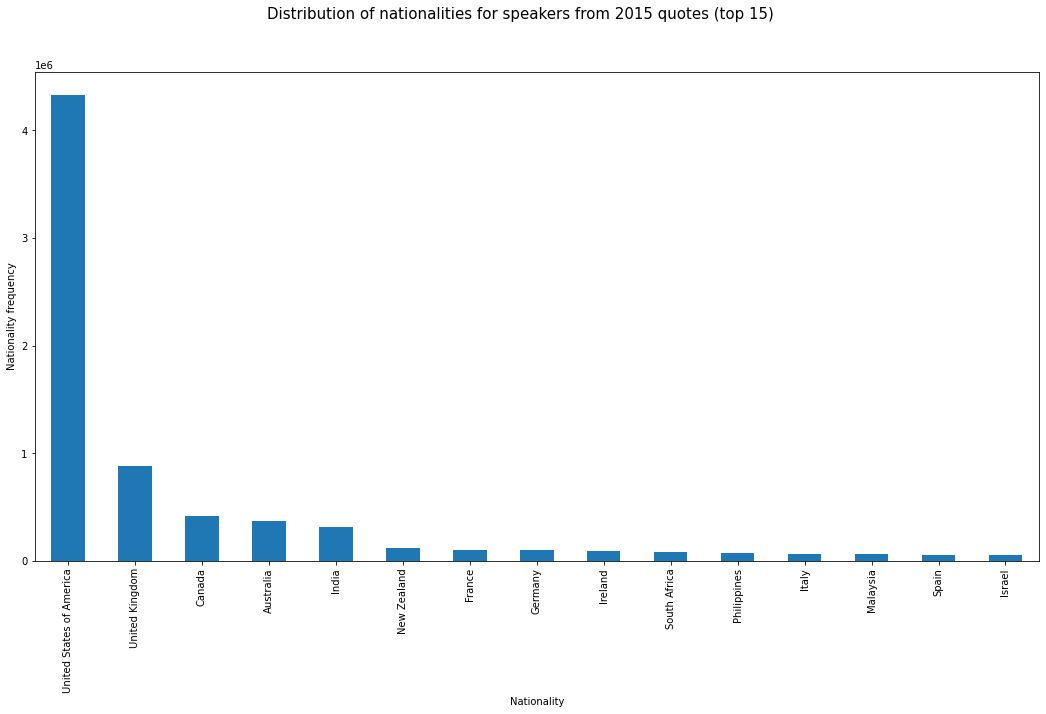

In [44]:
fig, ax = plt.subplots(figsize=(18,9))
ax = dfmerged['nationality'].value_counts().head(15).plot.bar(x='nationality')
fig.suptitle("Distribution of nationalities for speakers from 2015 quotes (top 15)", fontsize = 15)
ax.set_xlabel('Nationality')
ax.set_ylabel('Nationality frequency')

In [45]:
dfmerged['nationality'].value_counts().head(15)

United States of America    4327989
United Kingdom               880955
Canada                       419944
Australia                    373552
India                        317089
New Zealand                  118599
France                       104524
Germany                      102337
Ireland                       95179
South Africa                  88395
Philippines                   77455
Italy                         63322
Malaysia                      62257
Spain                         57171
Israel                        53940
Name: nationality, dtype: int64

In [178]:
dfnationality2015 = dfmerged['nationality'].value_counts().rename_axis('unique_values').to_frame('counts')
print (dfnationality2015)

                                      counts
unique_values                               
United States of America             4327989
United Kingdom                        880955
Canada                                419944
Australia                             373552
India                                 317089
...                                      ...
Santiago de Cuba Province                  1
Palestinian                                1
Glaspy                                     1
Protectorate of Bohemia and Moravia        1
Great Britain                              1

[359 rows x 1 columns]


### Academic degree

Text(0, 0.5, 'Academic degree frequency')

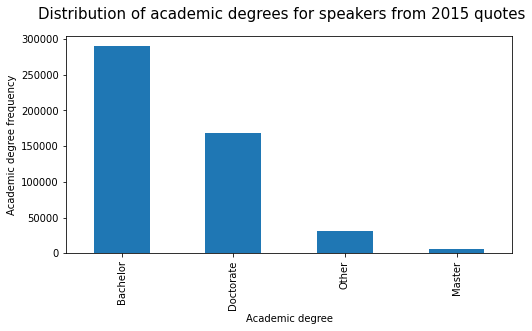

In [47]:
fig, ax = plt.subplots(figsize=(8,4))
ax = dfmerged['academic_degree'].value_counts().plot.bar(x='academic_degree')
fig.suptitle("Distribution of academic degrees for speakers from 2015 quotes", fontsize = 15)
ax.set_xlabel('Academic degree')
ax.set_ylabel('Academic degree frequency')

In [48]:
dfmerged['academic_degree'].value_counts()

Bachelor     289771
Doctorate    168447
Other         31661
Master         5794
Name: academic_degree, dtype: int64

In [49]:
dfacademicdegree2015 = dfmerged['academic_degree'].value_counts().rename_axis('unique_values').to_frame('counts')
print (dfacademicdegree2015)

               counts
unique_values        
Bachelor       289771
Doctorate      168447
Other           31661
Master           5794


### Date of birth

Text(0, 0.5, 'Year frequency')

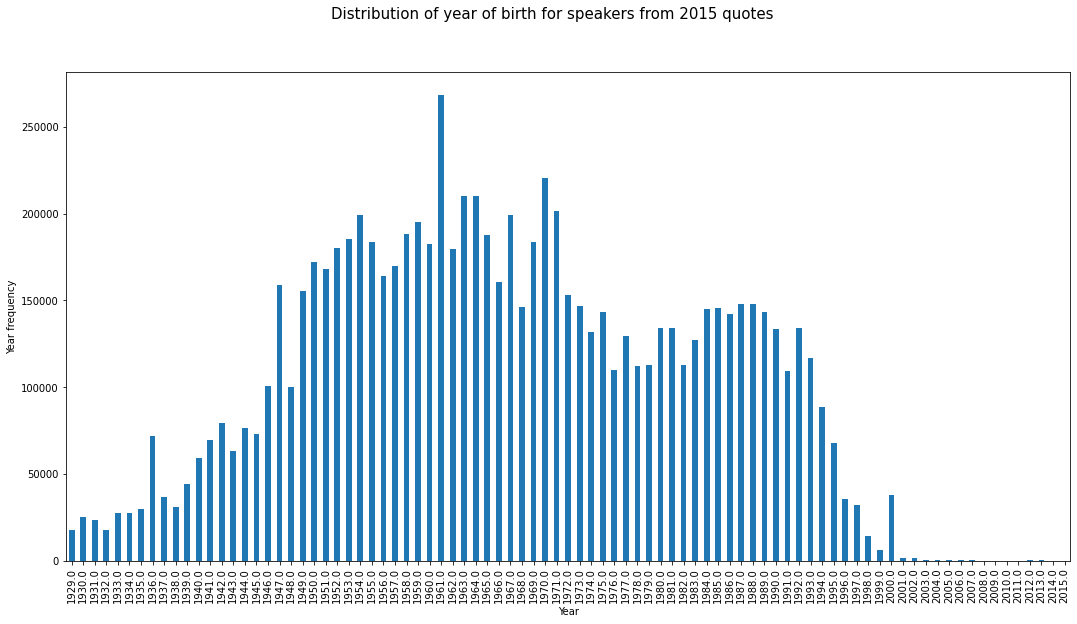

In [50]:
fig, ax = plt.subplots(figsize=(18,9))
ax = dfmerged['date_of_birth'].sort_values().value_counts(sort=False).plot.bar(x='date_of_birth')
fig.suptitle("Distribution of year of birth for speakers from 2015 quotes", fontsize = 15)
ax.set_xlabel('Year')
ax.set_ylabel('Year frequency')

In [51]:
dfmerged['date_of_birth'].value_counts().head(15)

1961.0    268413
1970.0    220643
1964.0    210063
1963.0    209871
1971.0    201228
1967.0    199320
1954.0    199039
1959.0    195244
1958.0    188440
1965.0    187709
1953.0    185415
1955.0    183761
1969.0    183738
1960.0    182560
1952.0    180260
Name: date_of_birth, dtype: int64

In [179]:
dfyears2015 = dfmerged['date_of_birth'].value_counts().rename_axis('unique_values').to_frame('counts')
print (dfyears2015)

               counts
unique_values        
1961.0         268413
1970.0         220643
1964.0         210063
1963.0         209871
1971.0         201228
...               ...
2008.0            100
2011.0             97
2010.0             96
2009.0             68
2014.0             28

[87 rows x 1 columns]


In [218]:
dfmerged = dfmerged[~dfmerged.qid.duplicated(keep='first')]
dfmerged

,quoteID,qid,sentence_count,._per_sentence,",_per_sentence",!_per_sentence,?_per_sentence,:_per_sentence,;_per_sentence,sign_per_token,...,self_ratio,union_ratio,other_ratio,sentiment,date_of_birth,nationality,gender,occupation,academic_degree,religion
0,2015-08-31-000271,Q270316,2,1.0,0.500000,0.0,0.0,0.0,0.0,0.063830,...,-1.0,-0.333333,0.333333,0.140,1947.0,United States of America,Female,Politics,NaN,Christian
31,2015-10-04-000115,Q1253,1,0.0,1.000000,0.0,0.0,0.0,0.0,0.066667,...,0.0,0.000000,0.000000,-0.038,1944.0,South Korea,Male,Politics,NaN,Other
399,2015-06-19-016191,Q468374,1,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.000000,0.351,1956.0,India,Male,Other,NaN,Hindus
404,2015-08-31-000309,Q19874690,1,1.0,0.000000,0.0,0.0,0.0,0.0,0.026316,...,-1.0,-0.333333,0.333333,-0.103,1959.0,Australia,Male,Sciences,NaN,Muslim
409,2015-12-10-000332,Q5271548,1,0.0,1.000000,0.0,0.0,0.0,0.0,0.058824,...,0.0,0.000000,0.000000,0.000,1938.0,United States of America,Female,Arts,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8648164,2015-09-11-023231,Q51132238,1,0.0,1.000000,0.0,0.0,0.0,0.0,0.166667,...,-1.0,1.000000,-1.000000,-0.403,1995.0,United States of America,Male,Sports,NaN,NaN
8648165,2015-05-20-012152,Q16238893,1,0.0,3.000000,0.0,0.0,0.0,0.0,0.103448,...,1.0,-1.000000,-1.000000,0.065,1950.0,NaN,Male,Sports,NaN,NaN
8648168,2015-12-23-016983,Q7345910,1,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,1.0,-1.000000,-1.000000,-0.452,1934.0,Canada,Male,Arts,NaN,Christian
8648180,2015-11-26-015691,Q9190959,1,0.0,3.000000,0.0,0.0,0.0,0.0,0.096774,...,0.0,0.000000,0.000000,-0.112,1990.0,Sweden,Male,Sports,NaN,NaN


In [96]:
del dfquotes2015
del dfmerged

## 2016 exploration

In [56]:
dfmerged = pd.read_csv('UniqueSpeakers\speakerfilter\merged_data_2016.csv.gzip', compression='gzip')
dfmerged.drop('Unnamed: 0', axis=1, inplace=True)
len(dfmerged)

5656430

### Gender

Text(0, 0.5, 'Gender frequency')

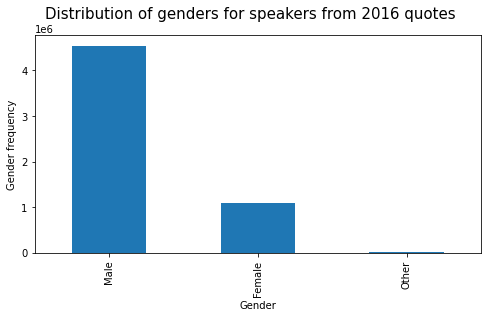

In [58]:
fig, ax = plt.subplots(figsize=(8,4))
ax = dfmerged['gender'].value_counts().plot.bar(x='gender')
fig.suptitle("Distribution of genders for speakers from 2016 quotes", fontsize = 15)
ax.set_xlabel('Gender')
ax.set_ylabel('Gender frequency')

In [59]:
dfmerged['gender'].value_counts()

Male      4545003
Female    1095609
Other       15818
Name: gender, dtype: int64

In [60]:
dfgender2016 = dfmerged['gender'].value_counts().rename_axis('unique_values').to_frame('counts')
print (dfgender2016)

                counts
unique_values         
Male           4545003
Female         1095609
Other            15818


### Religion

Text(0, 0.5, 'Religion frequency')

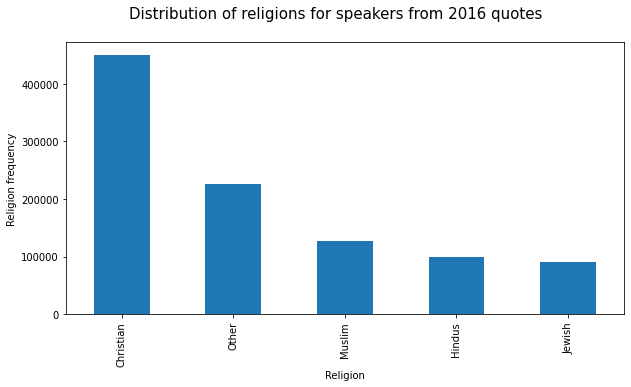

In [61]:
fig, ax = plt.subplots(figsize=(10,5))
ax = dfmerged['religion'].value_counts().plot.bar(x='religion')
fig.suptitle("Distribution of religions for speakers from 2016 quotes", fontsize = 15)
ax.set_xlabel('Religion')
ax.set_ylabel('Religion frequency')

In [62]:
dfmerged['religion'].value_counts()

Christian    450025
Other        226599
Muslim       127469
Hindus        98517
Jewish        89752
Name: religion, dtype: int64

In [63]:
dfreligion2016 = dfmerged['religion'].value_counts().rename_axis('unique_values').to_frame('counts')
print (dfreligion2016)

               counts
unique_values        
Christian      450025
Other          226599
Muslim         127469
Hindus          98517
Jewish          89752


### Occupation

Text(0, 0.5, 'Occupation frequency')

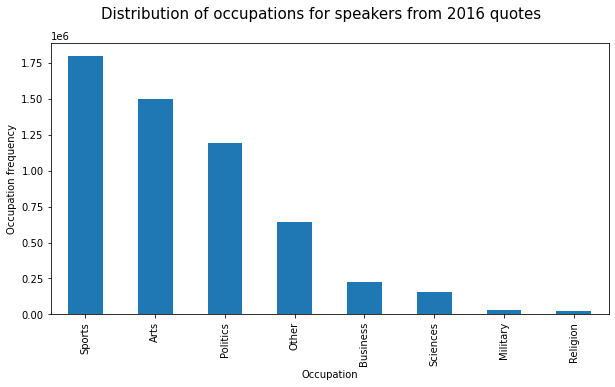

In [64]:
fig, ax = plt.subplots(figsize=(10,5))
ax = dfmerged['occupation'].value_counts().plot.bar(x='occupation')
fig.suptitle("Distribution of occupations for speakers from 2016 quotes", fontsize = 15)
ax.set_xlabel('Occupation')
ax.set_ylabel('Occupation frequency')

In [65]:
dfmerged['occupation'].value_counts()

Sports      1799753
Arts        1499585
Politics    1190383
Other        640142
Business     225214
Sciences     156062
Military      33770
Religion      22489
Name: occupation, dtype: int64

In [66]:
dfoccupation2016 = dfmerged['occupation'].value_counts().rename_axis('unique_values').to_frame('counts')
print (dfoccupation2016)

                counts
unique_values         
Sports         1799753
Arts           1499585
Politics       1190383
Other           640142
Business        225214
Sciences        156062
Military         33770
Religion         22489


### Nationality

Text(0, 0.5, 'Nationality frequency')

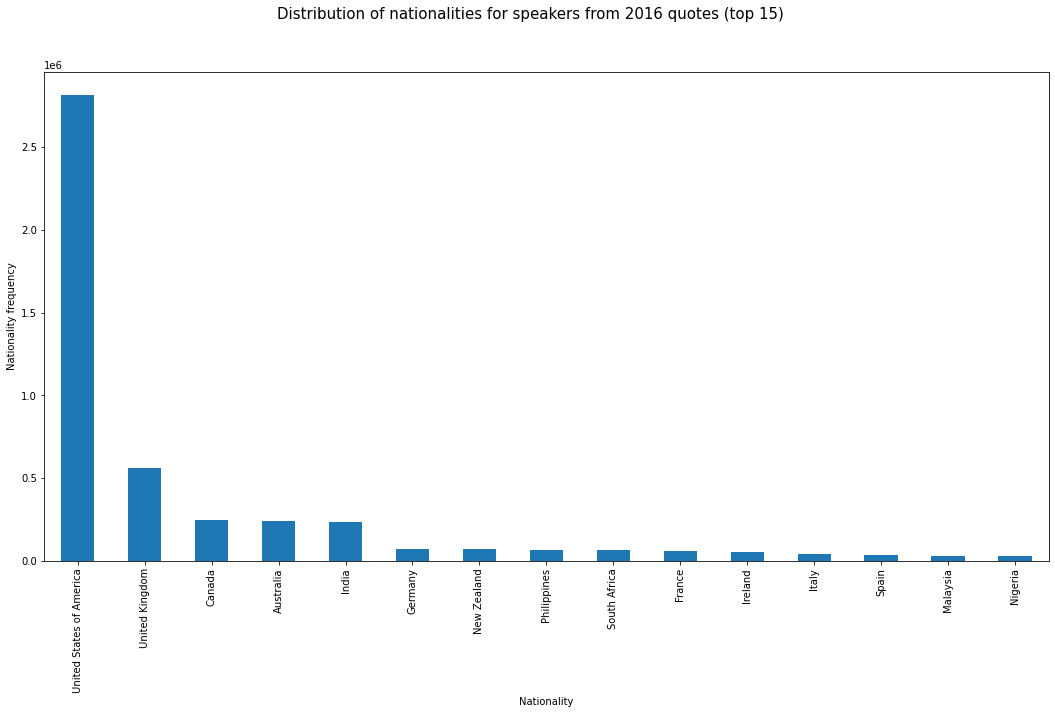

In [67]:
fig, ax = plt.subplots(figsize=(18,9))
ax = dfmerged['nationality'].value_counts().head(15).plot.bar(x='nationality')
fig.suptitle("Distribution of nationalities for speakers from 2016 quotes (top 15)", fontsize = 15)
ax.set_xlabel('Nationality')
ax.set_ylabel('Nationality frequency')

In [68]:
dfmerged['nationality'].value_counts().head(15)

United States of America    2812508
United Kingdom               564281
Canada                       248633
Australia                    240856
India                        235799
Germany                       73542
New Zealand                   73244
Philippines                   69370
South Africa                  64416
France                        63124
Ireland                       51857
Italy                         45159
Spain                         38537
Malaysia                      32207
Nigeria                       30036
Name: nationality, dtype: int64

In [181]:
dfnationality2016 = dfmerged['nationality'].value_counts().rename_axis('unique_values').to_frame('counts')
print (dfnationality2016)

                                      counts
unique_values                               
United States of America             2812508
United Kingdom                        564281
Canada                                248633
Australia                             240856
India                                 235799
...                                      ...
Holland                                    1
Protectorate of Bohemia and Moravia        1
Unified Team at the Olympics               1
Germa                                      1
Chinoise                                   1

[347 rows x 1 columns]


### Academic degree

Text(0, 0.5, 'Academic degree frequency')

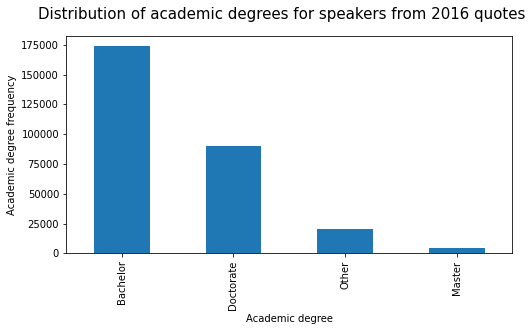

In [70]:
fig, ax = plt.subplots(figsize=(8,4))
ax = dfmerged['academic_degree'].value_counts().plot.bar(x='academic_degree')
fig.suptitle("Distribution of academic degrees for speakers from 2016 quotes", fontsize = 15)
ax.set_xlabel('Academic degree')
ax.set_ylabel('Academic degree frequency')

In [71]:
dfmerged['academic_degree'].value_counts()

Bachelor     173795
Doctorate     90434
Other         20175
Master         4830
Name: academic_degree, dtype: int64

In [72]:
dfacademicdegree2016 = dfmerged['academic_degree'].value_counts().rename_axis('unique_values').to_frame('counts')
print (dfacademicdegree2016)

               counts
unique_values        
Bachelor       173795
Doctorate       90434
Other           20175
Master           4830


### Date of birth

Text(0, 0.5, 'Year frequency')

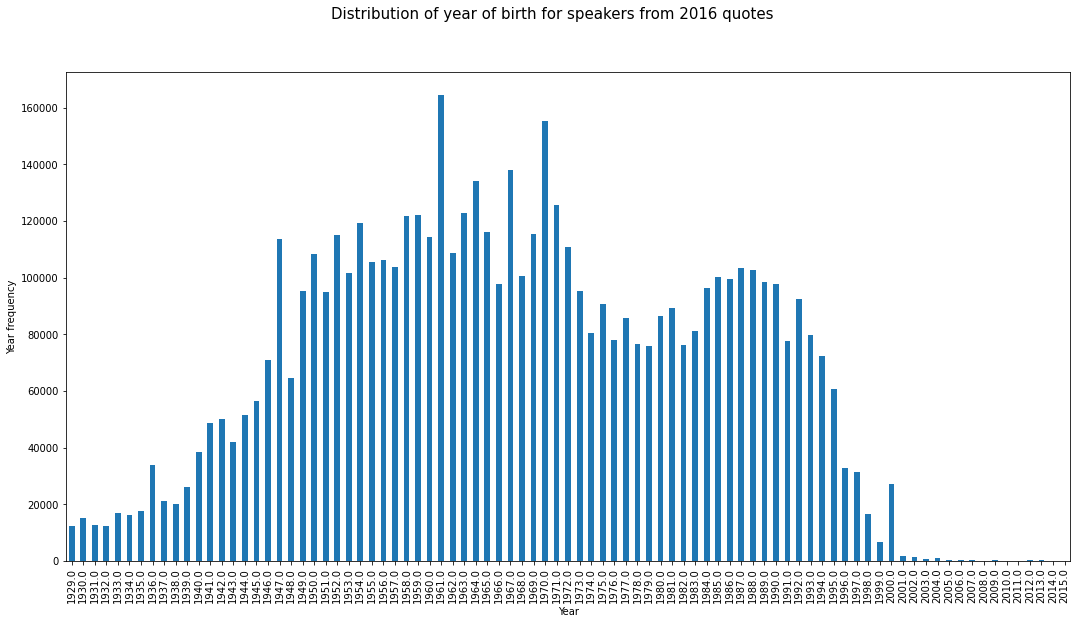

In [73]:
fig, ax = plt.subplots(figsize=(18,9))
ax = dfmerged['date_of_birth'].sort_values().value_counts(sort=False).plot.bar(x='date_of_birth')
fig.suptitle("Distribution of year of birth for speakers from 2016 quotes", fontsize = 15)
ax.set_xlabel('Year')
ax.set_ylabel('Year frequency')

In [74]:
dfmerged['date_of_birth'].value_counts().head(15)

1961.0    164524
1970.0    155440
1967.0    138052
1964.0    133971
1971.0    125803
1963.0    122803
1959.0    122043
1958.0    121721
1954.0    119436
1965.0    116264
1969.0    115465
1952.0    115051
1960.0    114424
1947.0    113567
1972.0    110717
Name: date_of_birth, dtype: int64

In [182]:
dfyears2016 = dfmerged['date_of_birth'].value_counts().rename_axis('unique_values').to_frame('counts')
print (dfyears2016)

               counts
unique_values        
1961.0         164524
1970.0         155440
1967.0         138052
1964.0         133971
1971.0         125803
...               ...
2015.0             58
2011.0             51
2008.0             36
2010.0             33
2014.0             17

[87 rows x 1 columns]


In [76]:
dfmerged = dfmerged[~dfmerged.qid.duplicated(keep='first')]
dfmerged

,quoteID,qid,sentence_count,._per_sentence,",_per_sentence",!_per_sentence,?_per_sentence,:_per_sentence,;_per_sentence,sign_per_token,...,self_ratio,union_ratio,other_ratio,sentiment,date_of_birth,nationality,gender,occupation,academic_degree,religion
0,2016-07-31-000006,Q6847325,1,1.0,0.0,0.0,0.0,0.0,0.0,0.058824,...,0.0,0.0,-1.0,0.000,1965.0,United States of America,Male,Arts,NaN,NaN
2,2016-07-11-000226,Q6294,1,1.0,0.0,0.0,0.0,0.0,0.0,0.076923,...,1.0,-1.0,-1.0,0.225,1947.0,United States of America,Female,Politics,Bachelor,Other
3244,2016-05-26-000371,Q26129591,1,0.0,1.0,0.0,0.0,0.0,0.0,0.062500,...,-1.0,-1.0,1.0,0.000,1990.0,NaN,Male,Sports,NaN,NaN
3247,2016-05-16-000278,Q2059029,1,1.0,1.0,0.0,0.0,0.0,0.0,0.071429,...,-1.0,-1.0,1.0,0.125,1933.0,United States of America,Male,Arts,NaN,NaN
3249,2016-12-23-000368,Q319336,3,1.0,0.0,0.0,0.0,0.0,0.0,0.125000,...,1.0,-1.0,-1.0,0.315,1977.0,United States of America,Male,Sports,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5656341,2016-05-21-061434,Q4524077,1,0.0,3.0,0.0,0.0,0.0,0.0,0.107143,...,0.0,0.0,0.0,-0.074,1942.0,United States of America,Male,Other,Doctorate,NaN
5656363,2016-07-12-108356,Q1286018,2,1.0,0.5,0.0,0.0,0.0,0.0,0.130435,...,-1.0,1.0,-1.0,0.244,1949.0,United States of America,Male,Arts,NaN,NaN
5656380,2016-05-10-134957,Q20724818,1,1.0,1.0,0.0,0.0,0.0,0.0,0.133333,...,-1.0,1.0,-1.0,0.000,1970.0,Germany,Male,NaN,NaN,NaN
5656386,2016-08-30-126794,Q23920496,1,1.0,2.0,0.0,0.0,0.0,0.0,0.078947,...,-1.0,0.5,-0.5,-0.087,1971.0,NaN,Male,Politics,NaN,NaN


In [115]:
del dfquotes2016
del dfmerged

## 2017 Exploration

In [80]:
dfmerged = pd.read_csv('UniqueSpeakers\speakerfilter\merged_data_2017.csv.gzip', compression='gzip')
dfmerged = dfmerged.drop('Unnamed: 0', axis=1)
len(dfmerged)

10847892

### Gender

Text(0, 0.5, 'Gender frequency')

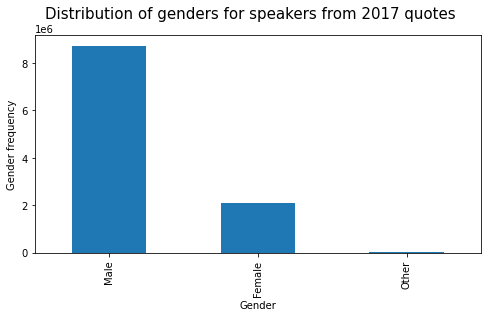

In [81]:
fig, ax = plt.subplots(figsize=(8,4))
ax = dfmerged['gender'].value_counts().plot.bar(x='gender')
fig.suptitle("Distribution of genders for speakers from 2017 quotes", fontsize = 15)
ax.set_xlabel('Gender')
ax.set_ylabel('Gender frequency')

In [82]:
dfmerged['gender'].value_counts()

Male      8733820
Female    2077603
Other       36469
Name: gender, dtype: int64

In [83]:
dfgender2017 = dfmerged['gender'].value_counts().rename_axis('unique_values').to_frame('counts')
print (dfgender2017)

                counts
unique_values         
Male           8733820
Female         2077603
Other            36469


### Religion

Text(0, 0.5, 'Religion frequency')

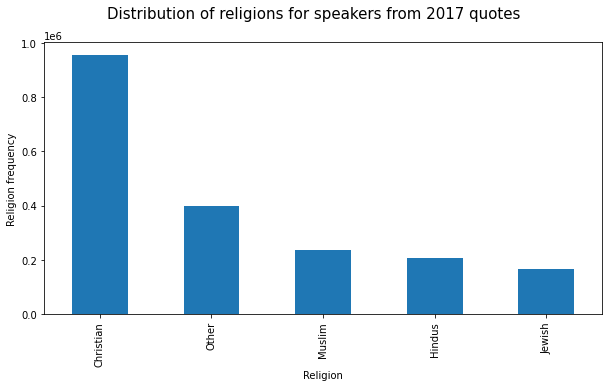

In [84]:
fig, ax = plt.subplots(figsize=(10,5))
ax = dfmerged['religion'].value_counts().plot.bar(x='religion')
fig.suptitle("Distribution of religions for speakers from 2017 quotes", fontsize = 15)
ax.set_xlabel('Religion')
ax.set_ylabel('Religion frequency')

In [85]:
dfmerged['religion'].value_counts()

Christian    953919
Other        399353
Muslim       236095
Hindus       205553
Jewish       165233
Name: religion, dtype: int64

In [86]:
dfreligion2017 = dfmerged['religion'].value_counts().rename_axis('unique_values').to_frame('counts')
print (dfreligion2017)

               counts
unique_values        
Christian      953919
Other          399353
Muslim         236095
Hindus         205553
Jewish         165233


### Occupation

Text(0, 0.5, 'Occupation frequency')

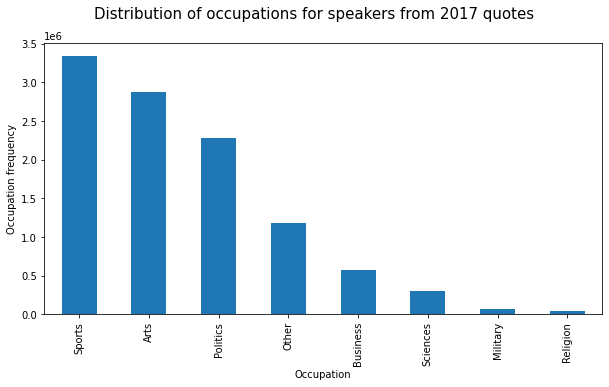

In [87]:
fig, ax = plt.subplots(figsize=(10,5))
ax = dfmerged['occupation'].value_counts().plot.bar(x='occupation')
fig.suptitle("Distribution of occupations for speakers from 2017 quotes", fontsize = 15)
ax.set_xlabel('Occupation')
ax.set_ylabel('Occupation frequency')

In [88]:
dfmerged['occupation'].value_counts()

Sports      3347109
Arts        2878707
Politics    2284308
Other       1188355
Business     568980
Sciences     298242
Military      74009
Religion      39534
Name: occupation, dtype: int64

In [89]:
dfoccupation2017 = dfmerged['occupation'].value_counts().rename_axis('unique_values').to_frame('counts')
print (dfoccupation2017)

                counts
unique_values         
Sports         3347109
Arts           2878707
Politics       2284308
Other          1188355
Business        568980
Sciences        298242
Military         74009
Religion         39534


### Nationality

Text(0, 0.5, 'Nationality frequency')

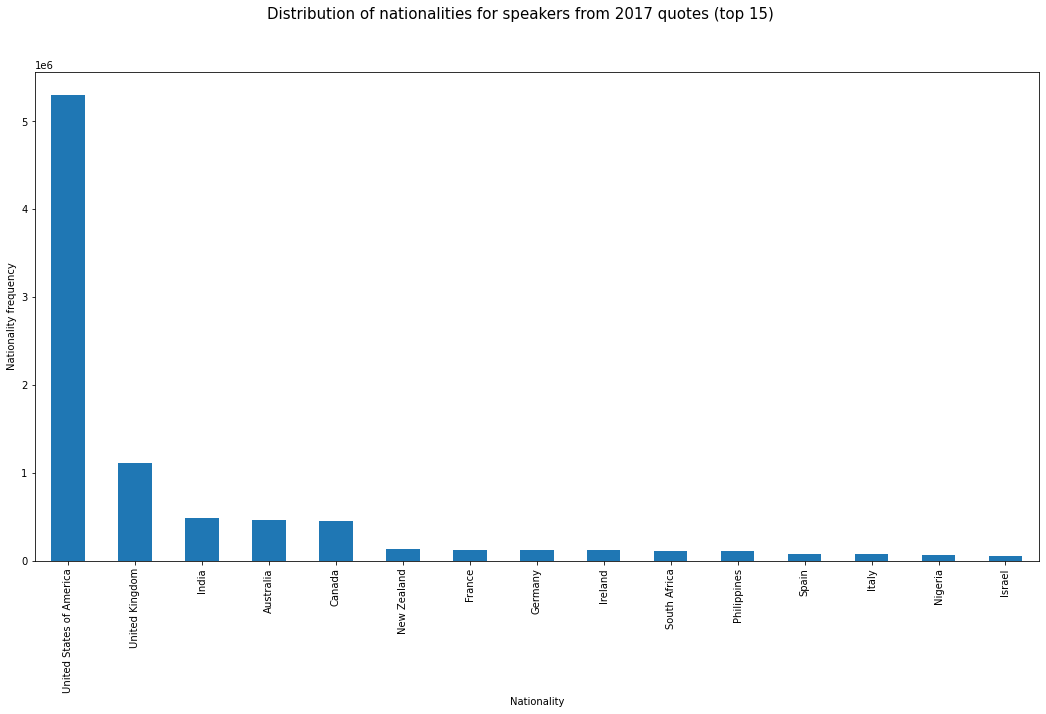

In [90]:
fig, ax = plt.subplots(figsize=(18,9))
ax = dfmerged['nationality'].value_counts().head(15).plot.bar(x='nationality')
fig.suptitle("Distribution of nationalities for speakers from 2017 quotes (top 15)", fontsize = 15)
ax.set_xlabel('Nationality')
ax.set_ylabel('Nationality frequency')

In [91]:
dfmerged['nationality'].value_counts().head(15)

United States of America    5298472
United Kingdom              1116803
India                        494332
Australia                    470551
Canada                       450081
New Zealand                  142611
France                       129190
Germany                      126739
Ireland                      124070
South Africa                 117612
Philippines                  116782
Spain                         80371
Italy                         75243
Nigeria                       73759
Israel                        61006
Name: nationality, dtype: int64

In [184]:
dfnationality2017 = dfmerged['nationality'].value_counts().rename_axis('unique_values').to_frame('counts')
print (dfnationality2017)

                           counts
unique_values                    
United States of America  5298472
United Kingdom            1116803
India                      494332
Australia                  470551
Canada                     450081
...                           ...
Nazareth                        1
Indian                          1
Macedonia                       1
Romanians                       1
Africa                          1

[366 rows x 1 columns]


### Academic degree

Text(0, 0.5, 'Academic degree frequency')

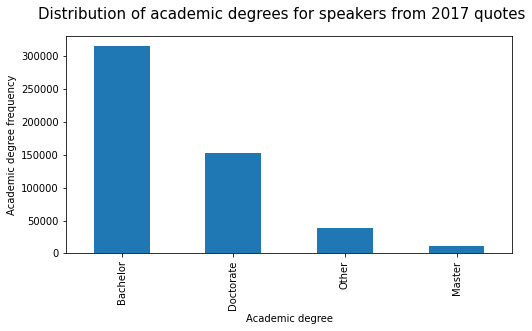

In [93]:
fig, ax = plt.subplots(figsize=(8,4))
ax = dfmerged['academic_degree'].value_counts().plot.bar(x='academic_degree')
fig.suptitle("Distribution of academic degrees for speakers from 2017 quotes", fontsize = 15)
ax.set_xlabel('Academic degree')
ax.set_ylabel('Academic degree frequency')

In [94]:
dfmerged['academic_degree'].value_counts()

Bachelor     314563
Doctorate    152934
Other         38871
Master        11511
Name: academic_degree, dtype: int64

In [95]:
dfacademicdegree2017 = dfmerged['academic_degree'].value_counts().rename_axis('unique_values').to_frame('counts')
print (dfacademicdegree2017)

               counts
unique_values        
Bachelor       314563
Doctorate      152934
Other           38871
Master          11511


### Date of birth

Text(0, 0.5, 'Year frequency')

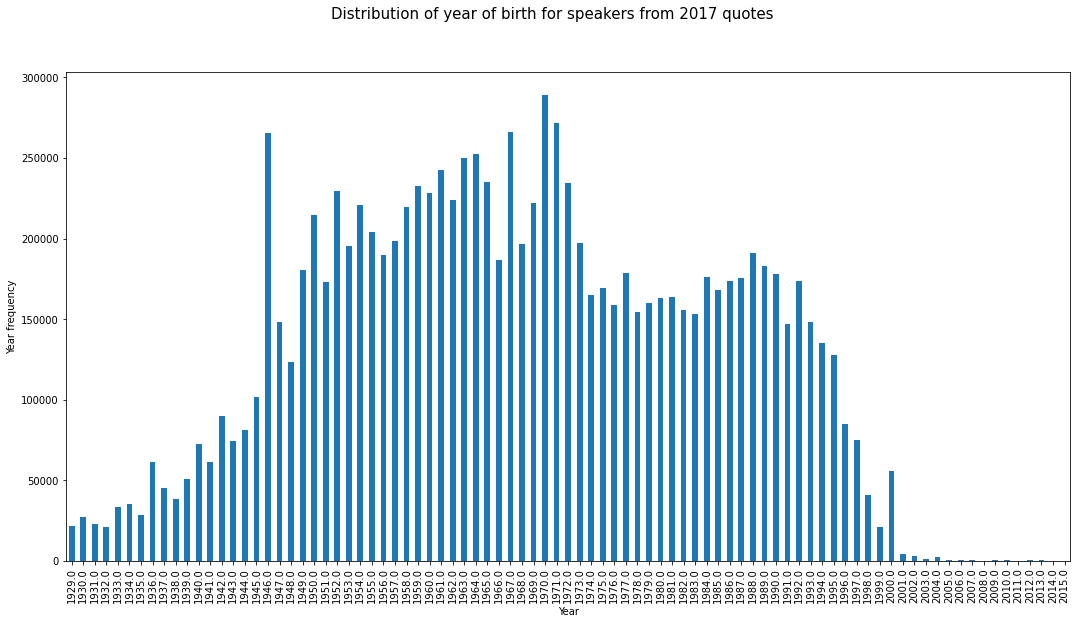

In [96]:
fig, ax = plt.subplots(figsize=(18,9))
ax = dfmerged['date_of_birth'].sort_values().value_counts(sort=False).plot.bar(x='date_of_birth')
fig.suptitle("Distribution of year of birth for speakers from 2017 quotes", fontsize = 15)
ax.set_xlabel('Year')
ax.set_ylabel('Year frequency')

In [97]:
dfmerged['date_of_birth'].value_counts().head(15)

1970.0    289139
1971.0    271791
1967.0    266114
1946.0    265489
1964.0    252244
1963.0    250057
1961.0    242681
1965.0    235082
1972.0    234192
1959.0    232802
1952.0    229482
1960.0    228140
1962.0    223971
1969.0    221975
1954.0    220511
Name: date_of_birth, dtype: int64

In [185]:
dfyears2017 = dfmerged['date_of_birth'].value_counts().rename_axis('unique_values').to_frame('counts')
print (dfyears2017)

               counts
unique_values        
1970.0         289139
1971.0         271791
1967.0         266114
1946.0         265489
1964.0         252244
...               ...
2009.0            202
2008.0            160
2011.0            137
2015.0            126
2014.0             22

[87 rows x 1 columns]


In [99]:
dfmerged = dfmerged[~dfmerged.qid.duplicated(keep='first')]
dfmerged

,quoteID,qid,sentence_count,._per_sentence,",_per_sentence",!_per_sentence,?_per_sentence,:_per_sentence,;_per_sentence,sign_per_token,...,self_ratio,union_ratio,other_ratio,sentiment,date_of_birth,nationality,gender,occupation,academic_degree,religion
0,2017-05-01-000095,Q6377094,1,0.0,1.0,0.0,0.0,0.0,0.0,0.024390,...,0.000000,0.000000,0.000000,0.103,1985.0,United States of America,Female,Business,NaN,NaN
5,2017-09-12-090806,Q185165,4,1.0,0.0,0.0,0.0,0.0,0.0,0.088889,...,0.333333,-0.333333,-1.000000,-0.008,1948.0,United Kingdom,Female,Arts,NaN,NaN
22,2017-10-24-000065,Q7280196,1,1.0,1.0,0.0,0.0,0.0,0.0,0.051282,...,0.000000,0.000000,0.000000,0.242,1978.0,NaN,Female,NaN,NaN,NaN
29,2017-06-08-000150,Q28076452,1,0.0,1.0,0.0,0.0,0.0,0.0,0.055556,...,0.000000,0.000000,0.000000,0.167,1974.0,NaN,Male,Business,NaN,NaN
52,2017-08-29-070805,Q2439821,1,0.0,1.0,0.0,0.0,0.0,0.0,0.047619,...,1.000000,-1.000000,-1.000000,0.059,1940.0,Canada,Male,Arts,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10847546,2017-12-03-013734,Q6148848,1,1.0,0.0,0.0,0.0,1.0,0.0,0.333333,...,0.000000,0.000000,0.000000,0.000,1950.0,United States of America,Female,Arts,NaN,NaN
10847548,2017-06-08-029755,Q266229,1,0.0,2.0,0.0,0.0,0.0,0.0,0.285714,...,0.000000,0.000000,0.000000,0.000,1948.0,France,Female,Arts,NaN,NaN
10847593,2017-06-01-038452,Q16131169,1,0.0,3.0,0.0,0.0,0.0,0.0,0.093750,...,1.000000,-1.000000,-1.000000,0.003,1974.0,Israel,Male,Politics,NaN,NaN
10847715,2017-08-03-059751,Q22681474,1,0.0,1.0,0.0,0.0,0.0,1.0,0.066667,...,0.333333,-1.000000,-0.333333,0.087,1991.0,Finland,Female,Other,NaN,NaN


In [24]:
del dfquotes2017
del dfmerged

## 2018 exploration

In [103]:
dfmerged = pd.read_csv('UniqueSpeakers\speakerfilter\merged_data_2018.csv.gzip', compression='gzip')
dfmerged = dfmerged.drop('Unnamed: 0', axis=1)
len(dfmerged)

11231067

### Gender

Text(0, 0.5, 'Gender frequency')

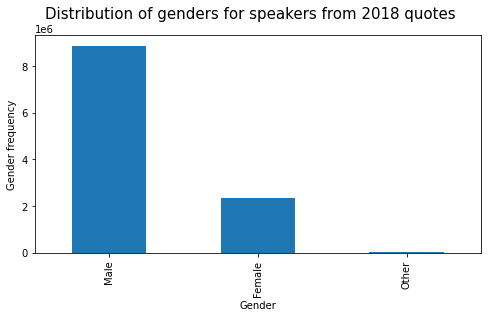

In [104]:
fig, ax = plt.subplots(figsize=(8,4))
ax = dfmerged['gender'].value_counts().plot.bar(x='gender')
fig.suptitle("Distribution of genders for speakers from 2018 quotes", fontsize = 15)
ax.set_xlabel('Gender')
ax.set_ylabel('Gender frequency')

In [105]:
dfmerged['gender'].value_counts()

Male      8871328
Female    2324411
Other       35328
Name: gender, dtype: int64

In [106]:
dfgender2018 = dfmerged['gender'].value_counts().rename_axis('unique_values').to_frame('counts')
print (dfgender2018)

                counts
unique_values         
Male           8871328
Female         2324411
Other            35328


### Religion

Text(0, 0.5, 'Religion frequency')

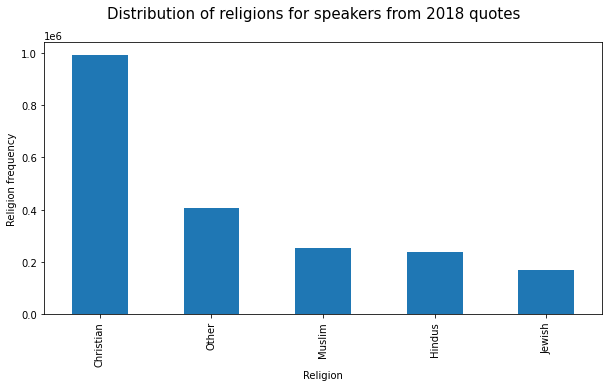

In [107]:
fig, ax = plt.subplots(figsize=(10,5))
ax = dfmerged['religion'].value_counts().plot.bar(x='religion')
fig.suptitle("Distribution of religions for speakers from 2018 quotes", fontsize = 15)
ax.set_xlabel('Religion')
ax.set_ylabel('Religion frequency')

In [108]:
dfmerged['religion'].value_counts()

Christian    991456
Other        406097
Muslim       254583
Hindus       237127
Jewish       170242
Name: religion, dtype: int64

In [109]:
dfreligion2018 = dfmerged['religion'].value_counts().rename_axis('unique_values').to_frame('counts')
print (dfreligion2018)

               counts
unique_values        
Christian      991456
Other          406097
Muslim         254583
Hindus         237127
Jewish         170242


### Occupation

Text(0, 0.5, 'Occupation frequency')

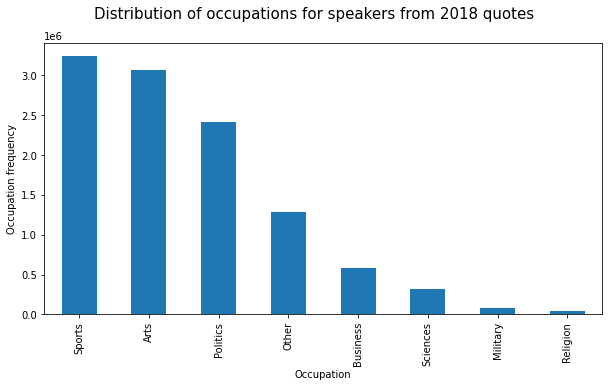

In [110]:
fig, ax = plt.subplots(figsize=(10,5))
ax = dfmerged['occupation'].value_counts().plot.bar(x='occupation')
fig.suptitle("Distribution of occupations for speakers from 2018 quotes", fontsize = 15)
ax.set_xlabel('Occupation')
ax.set_ylabel('Occupation frequency')

In [111]:
dfmerged['occupation'].value_counts()

Sports      3248793
Arts        3068501
Politics    2419746
Other       1286182
Business     585160
Sciences     319764
Military      84035
Religion      47408
Name: occupation, dtype: int64

In [112]:
dfoccupation2018 = dfmerged['occupation'].value_counts().rename_axis('unique_values').to_frame('counts')
print (dfoccupation2018)

                counts
unique_values         
Sports         3248793
Arts           3068501
Politics       2419746
Other          1286182
Business        585160
Sciences        319764
Military         84035
Religion         47408


### Nationality

Text(0, 0.5, 'Nationality frequency')

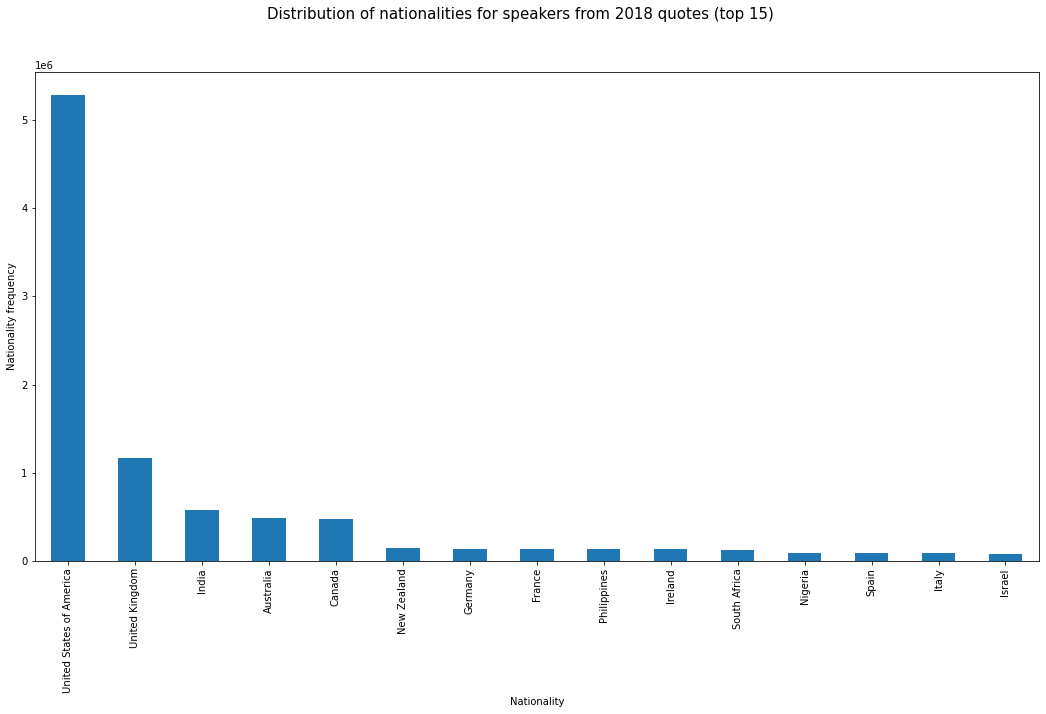

In [113]:
fig, ax = plt.subplots(figsize=(18,9))
ax = dfmerged['nationality'].value_counts().head(15).plot.bar(x='nationality')
fig.suptitle("Distribution of nationalities for speakers from 2018 quotes (top 15)", fontsize = 15)
ax.set_xlabel('Nationality')
ax.set_ylabel('Nationality frequency')

In [114]:
dfmerged['nationality'].value_counts().head(15)

United States of America    5279909
United Kingdom              1169670
India                        575568
Australia                    487837
Canada                       480538
New Zealand                  144177
Germany                      140046
France                       137450
Philippines                  136216
Ireland                      131271
South Africa                 120437
Nigeria                       94883
Spain                         90726
Italy                         89028
Israel                        76175
Name: nationality, dtype: int64

In [187]:
dfnationality2018 = dfmerged['nationality'].value_counts().rename_axis('unique_values').to_frame('counts')
print (dfnationality2018)

                            counts
unique_values                     
United States of America   5279909
United Kingdom             1169670
India                       575568
Australia                   487837
Canada                      480538
...                            ...
Kingdom of Yugoslavia            1
Bosniaks                         1
Germa                            1
Korea under Japanese rule        1
Chechen                          1

[370 rows x 1 columns]


### Academic degree

Text(0, 0.5, 'Academic degree frequency')

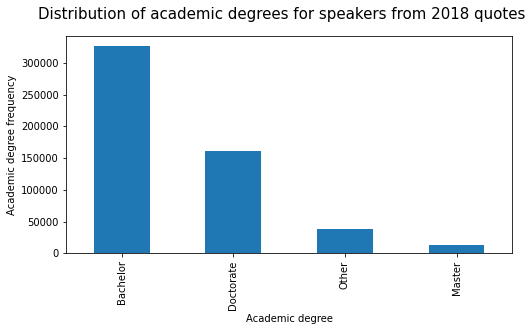

In [116]:
fig, ax = plt.subplots(figsize=(8,4))
ax = dfmerged['academic_degree'].value_counts().plot.bar(x='academic_degree')
fig.suptitle("Distribution of academic degrees for speakers from 2018 quotes", fontsize = 15)
ax.set_xlabel('Academic degree')
ax.set_ylabel('Academic degree frequency')

In [117]:
dfmerged['academic_degree'].value_counts()

Bachelor     326051
Doctorate    161782
Other         39020
Master        13324
Name: academic_degree, dtype: int64

In [118]:
dfacademicdegree2018 = dfmerged['academic_degree'].value_counts().rename_axis('unique_values').to_frame('counts')
print (dfacademicdegree2018)

               counts
unique_values        
Bachelor       326051
Doctorate      161782
Other           39020
Master          13324


### Date of birth

Text(0, 0.5, 'Year frequency')

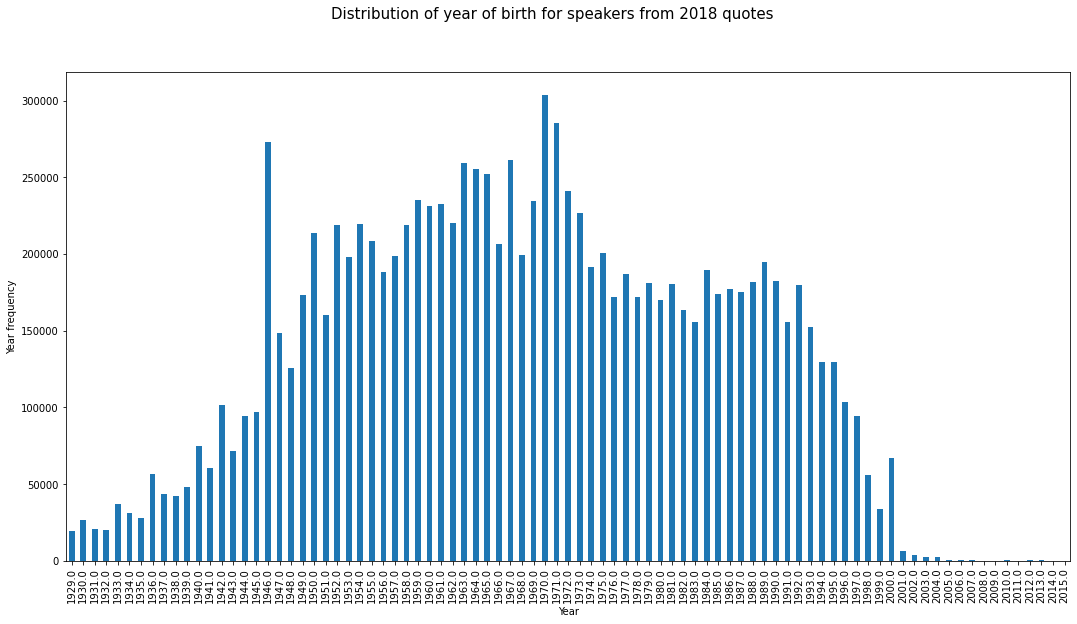

In [119]:
fig, ax = plt.subplots(figsize=(18,9))
ax = dfmerged['date_of_birth'].sort_values().value_counts(sort=False).plot.bar(x='date_of_birth')
fig.suptitle("Distribution of year of birth for speakers from 2018 quotes", fontsize = 15)
ax.set_xlabel('Year')
ax.set_ylabel('Year frequency')

In [120]:
dfmerged['date_of_birth'].value_counts().head(15)

1970.0    303754
1971.0    285542
1946.0    273026
1967.0    261591
1963.0    259236
1964.0    255624
1965.0    252100
1972.0    241372
1959.0    235092
1969.0    234709
1961.0    232776
1960.0    231325
1973.0    226988
1962.0    219993
1954.0    219311
Name: date_of_birth, dtype: int64

In [188]:
dfyears2018 = dfmerged['date_of_birth'].value_counts().rename_axis('unique_values').to_frame('counts')
print (dfyears2018)

               counts
unique_values        
1970.0         303754
1971.0         285542
1946.0         273026
1967.0         261591
1963.0         259236
...               ...
2008.0            179
2015.0            155
2011.0            148
2009.0             68
2014.0             26

[87 rows x 1 columns]


In [122]:
dfmerged = dfmerged[~dfmerged.qid.duplicated(keep='first')]
dfmerged

,quoteID,qid,sentence_count,._per_sentence,",_per_sentence",!_per_sentence,?_per_sentence,:_per_sentence,;_per_sentence,sign_per_token,...,self_ratio,union_ratio,other_ratio,sentiment,date_of_birth,nationality,gender,occupation,academic_degree,religion
0,2018-06-30-000005,Q55997400,1,1.0,0.0,0.0,0.0,0.0,0.0,0.071429,...,0.0,0.000000,0.000000,0.000,1967.0,NaN,Male,NaN,NaN,NaN
4,2018-04-02-000086,Q115994,1,1.0,2.0,0.0,0.0,0.0,0.0,0.157895,...,1.0,-1.000000,-1.000000,0.344,1949.0,Switzerland,Female,Other,NaN,NaN
10,2018-07-16-000103,Q20740735,1,0.0,1.0,0.0,0.0,0.0,0.0,0.041667,...,0.0,0.000000,0.000000,0.163,1973.0,United States of America,Male,Politics,NaN,NaN
73,2018-09-18-000157,Q2070905,1,0.0,1.0,0.0,0.0,0.0,0.0,0.076923,...,0.0,0.000000,0.000000,0.167,1949.0,Canada,Male,Arts,NaN,NaN
133,2018-08-20-000101,Q11779495,1,0.0,1.0,0.0,0.0,0.0,0.0,0.083333,...,0.0,0.000000,0.000000,0.248,1975.0,United States of America,Female,Arts,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11230928,2018-03-13-151813,Q20707690,2,0.5,0.0,0.5,0.0,0.0,0.0,0.090909,...,-1.0,-0.333333,0.333333,0.245,1987.0,New Zealand,Male,Sports,NaN,NaN
11230940,2018-10-11-144496,Q4739609,1,0.0,2.0,0.0,0.0,0.0,0.0,0.080000,...,-1.0,-0.500000,0.500000,0.123,1993.0,United States of America,Female,Other,NaN,NaN
11230954,2018-04-09-129149,Q16702704,1,0.0,4.0,0.0,0.0,0.0,0.0,0.105263,...,-1.0,1.000000,-1.000000,0.358,1994.0,Russia,Male,Sports,NaN,NaN
11231002,2018-12-20-119209,Q18816737,1,0.0,2.0,0.0,0.0,0.0,0.0,0.095238,...,-1.0,-1.000000,1.000000,0.153,2000.0,NaN,Male,Other,NaN,NaN


In [23]:
del dfquotes2018
del dfmerged

## 2019 exploration

In [126]:
dfmerged = pd.read_csv('UniqueSpeakers\speakerfilter\merged_data_2019.csv.gzip', compression='gzip')
dfmerged = dfmerged.drop('Unnamed: 0', axis=1)
len(dfmerged)

9154287

### Gender

Text(0, 0.5, 'Gender frequency')

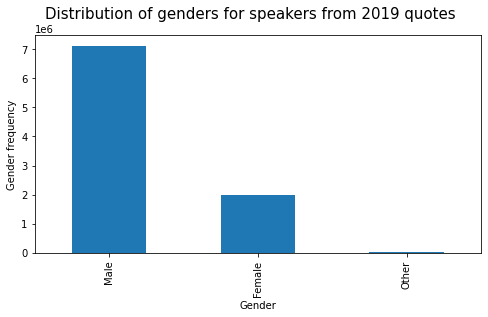

In [127]:
fig, ax = plt.subplots(figsize=(8,4))
ax = dfmerged['gender'].value_counts().plot.bar(x='gender')
fig.suptitle("Distribution of genders for speakers from 2019 quotes", fontsize = 15)
ax.set_xlabel('Gender')
ax.set_ylabel('Gender frequency')

In [128]:
dfmerged['gender'].value_counts()

Male      7127870
Female    1996692
Other       29725
Name: gender, dtype: int64

In [129]:
dfgender2019 = dfmerged['gender'].value_counts().rename_axis('unique_values').to_frame('counts')
print (dfgender2019)

                counts
unique_values         
Male           7127870
Female         1996692
Other            29725


### Religion

Text(0, 0.5, 'Religion frequency')

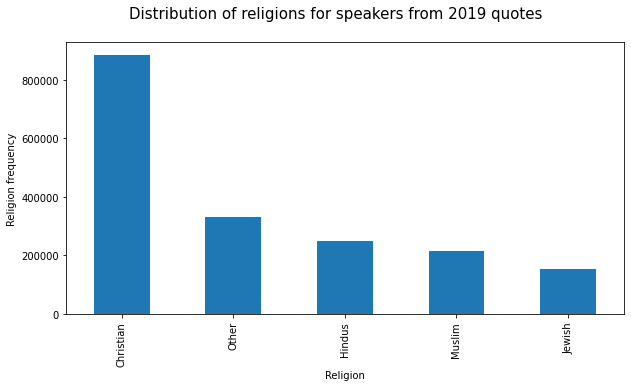

In [130]:
fig, ax = plt.subplots(figsize=(10,5))
ax = dfmerged['religion'].value_counts().plot.bar(x='religion')
fig.suptitle("Distribution of religions for speakers from 2019 quotes", fontsize = 15)
ax.set_xlabel('Religion')
ax.set_ylabel('Religion frequency')

In [131]:
dfmerged['religion'].value_counts()

Christian    883953
Other        330162
Hindus       248513
Muslim       216481
Jewish       154277
Name: religion, dtype: int64

In [132]:
dfreligion2019 = dfmerged['religion'].value_counts().rename_axis('unique_values').to_frame('counts')
print (dfreligion2019)

               counts
unique_values        
Christian      883953
Other          330162
Hindus         248513
Muslim         216481
Jewish         154277


### Occupation

Text(0, 0.5, 'Occupation frequency')

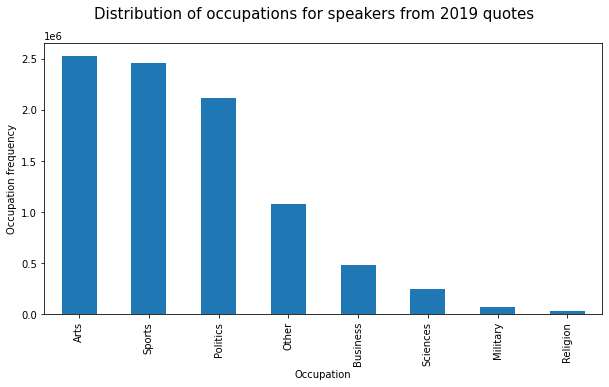

In [133]:
fig, ax = plt.subplots(figsize=(10,5))
ax = dfmerged['occupation'].value_counts().plot.bar(x='occupation')
fig.suptitle("Distribution of occupations for speakers from 2019 quotes", fontsize = 15)
ax.set_xlabel('Occupation')
ax.set_ylabel('Occupation frequency')

In [134]:
dfmerged['occupation'].value_counts()

Arts        2530115
Sports      2461454
Politics    2115053
Other       1082235
Business     478616
Sciences     245510
Military      70242
Religion      34872
Name: occupation, dtype: int64

In [135]:
dfoccupation2019 = dfmerged['occupation'].value_counts().rename_axis('unique_values').to_frame('counts')
print (dfoccupation2019)

                counts
unique_values         
Arts           2530115
Sports         2461454
Politics       2115053
Other          1082235
Business        478616
Sciences        245510
Military         70242
Religion         34872


### Nationality

Text(0, 0.5, 'Nationality frequency')

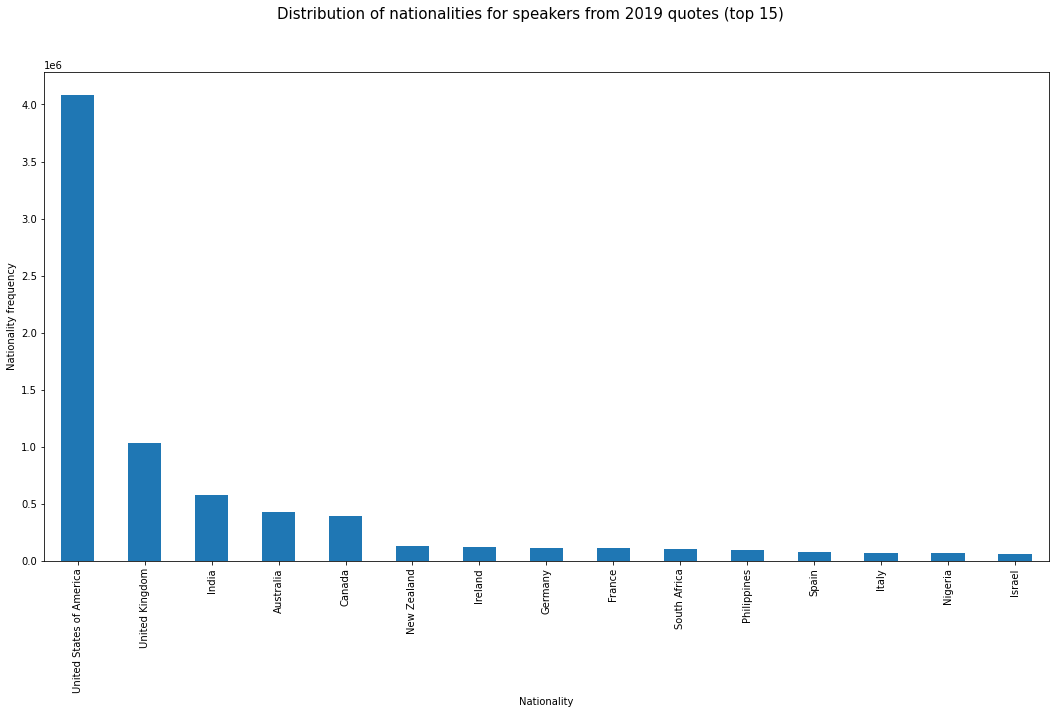

In [136]:
fig, ax = plt.subplots(figsize=(18,9))
ax = dfmerged['nationality'].value_counts().head(15).plot.bar(x='nationality')
fig.suptitle("Distribution of nationalities for speakers from 2019 quotes (top 15)", fontsize = 15)
ax.set_xlabel('Nationality')
ax.set_ylabel('Nationality frequency')

In [137]:
dfmerged['nationality'].value_counts().head(15)

United States of America    4082105
United Kingdom              1032955
India                        580607
Australia                    432147
Canada                       391745
New Zealand                  129476
Ireland                      118933
Germany                      112158
France                       110986
South Africa                 103547
Philippines                   99503
Spain                         75893
Italy                         74071
Nigeria                       72604
Israel                        64369
Name: nationality, dtype: int64

In [190]:
dfnationality2019 = dfmerged['nationality'].value_counts().rename_axis('unique_values').to_frame('counts')
print (dfnationality2019)

                               counts
unique_values                        
United States of America      4082105
United Kingdom                1032955
India                          580607
Australia                      432147
Canada                         391745
...                               ...
Free City of Danzig                 1
Israeli-occupied territories        1
Turkmenistan                        1
Sudanese                            1
Emirate of Dubai                    1

[361 rows x 1 columns]


### Academic degree

Text(0, 0.5, 'Academic degree frequency')

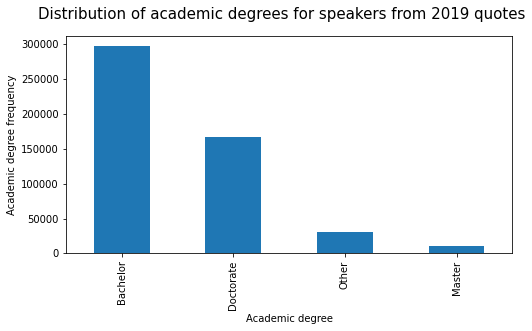

In [139]:
fig, ax = plt.subplots(figsize=(8,4))
ax = dfmerged['academic_degree'].value_counts().plot.bar(x='academic_degree')
fig.suptitle("Distribution of academic degrees for speakers from 2019 quotes", fontsize = 15)
ax.set_xlabel('Academic degree')
ax.set_ylabel('Academic degree frequency')

In [140]:
dfmerged['academic_degree'].value_counts()

Bachelor     297291
Doctorate    167733
Other         31241
Master        10147
Name: academic_degree, dtype: int64

In [141]:
dfacademicdegree2019 = dfmerged['academic_degree'].value_counts().rename_axis('unique_values').to_frame('counts')
print (dfacademicdegree2019)

               counts
unique_values        
Bachelor       297291
Doctorate      167733
Other           31241
Master          10147


### Date of birth

Text(0, 0.5, 'Year frequency')

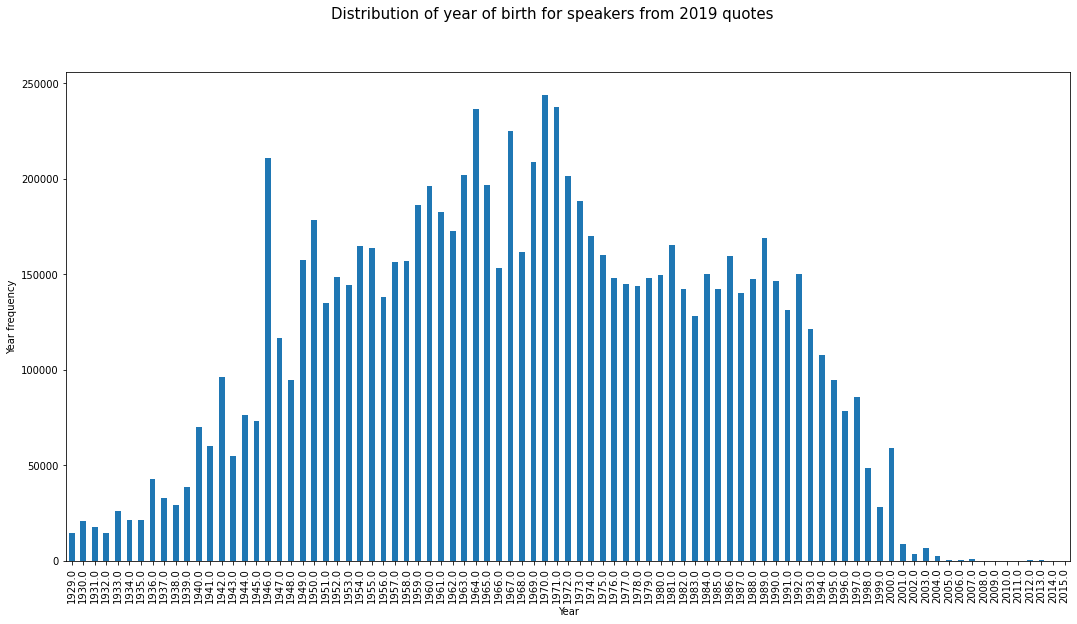

In [142]:
fig, ax = plt.subplots(figsize=(18,9))
ax = dfmerged['date_of_birth'].sort_values().value_counts(sort=False).plot.bar(x='date_of_birth')
fig.suptitle("Distribution of year of birth for speakers from 2019 quotes", fontsize = 15)
ax.set_xlabel('Year')
ax.set_ylabel('Year frequency')

In [143]:
dfmerged['date_of_birth'].value_counts().head(15)

1970.0    243910
1971.0    237519
1964.0    236424
1967.0    224759
1946.0    211113
1969.0    208829
1963.0    202036
1972.0    201346
1965.0    196609
1960.0    195953
1973.0    188147
1959.0    186148
1961.0    182765
1950.0    178276
1962.0    172594
Name: date_of_birth, dtype: int64

In [191]:
dfyears2019 = dfmerged['date_of_birth'].value_counts().rename_axis('unique_values').to_frame('counts')
print (dfyears2019)

               counts
unique_values        
1970.0         243910
1971.0         237519
1964.0         236424
1967.0         224759
1946.0         211113
...               ...
2015.0            118
2011.0             87
2009.0             57
2010.0             47
2014.0             28

[87 rows x 1 columns]


In [145]:
dfmerged = dfmerged[~dfmerged.qid.duplicated(keep='first')]
dfmerged

,quoteID,qid,sentence_count,._per_sentence,",_per_sentence",!_per_sentence,?_per_sentence,:_per_sentence,;_per_sentence,sign_per_token,...,self_ratio,union_ratio,other_ratio,sentiment,date_of_birth,nationality,gender,occupation,academic_degree,religion
0,2019-04-08-048753,Q22686,3,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.250000,...,0.000000,0.0,0.000000,-0.478,1946.0,United States of America,Male,Business,Bachelor,Christian
6313,2019-12-08-023053,Q809063,2,1.000000,2.500000,0.000000,0.0,0.5,0.0,0.103896,...,0.000000,0.0,0.000000,0.111,1945.0,United States of America,Male,Arts,NaN,NaN
6318,2019-02-21-000088,Q1971786,1,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.055556,...,0.000000,0.0,0.000000,0.171,1937.0,United States of America,Male,Arts,NaN,Muslim
6320,2019-02-28-000093,Q518770,1,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.040000,...,0.333333,-1.0,-0.333333,0.062,1979.0,United States of America,Male,Arts,NaN,NaN
6321,2019-02-01-053787,Q7172917,1,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.083333,...,-1.000000,1.0,-1.000000,0.000,1943.0,United States of America,Male,Other,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9154108,2019-02-18-017441,Q4997866,1,1.000000,1.000000,0.000000,0.0,0.0,0.0,0.083333,...,-1.000000,-1.0,1.000000,0.000,1951.0,United States of America,Male,Arts,NaN,NaN
9154113,2019-02-18-018271,Q7375947,1,0.000000,3.000000,0.000000,0.0,0.0,0.0,0.136364,...,-1.000000,-1.0,1.000000,0.098,1993.0,United States of America,Male,Arts,NaN,NaN
9154156,2019-02-08-029919,Q1883004,3,0.666667,2.666667,0.333333,0.0,0.0,0.0,0.144737,...,0.666667,-1.0,-0.666667,-0.010,1938.0,NaN,Male,Religion,NaN,Christian
9154185,2019-01-02-025620,Q11474452,1,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.047619,...,0.000000,-1.0,0.000000,0.370,1953.0,Japan,Male,Other,NaN,NaN


In [25]:
del dfquotes2019
del dfmerged

## Part 2 : Plots for all years summed up

In [1]:
#Sum different years
dfallgenders = dfgender2015+dfgender2016+dfgender2017+dfgender2018+dfgender2019+dfgender2020
dfallgenders

NameError: name 'dfallgenders' is not defined

<AxesSubplot:xlabel='unique_values'>

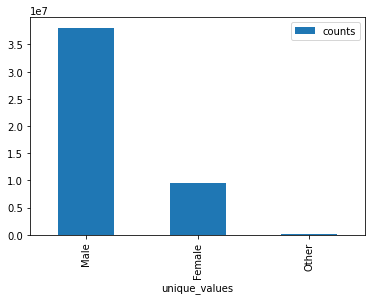

In [202]:
dfallgenders.plot.bar()

In [149]:
dfallreligions = dfreligion2015+dfreligion2016+dfreligion2017+dfreligion2018+dfreligion2019+dfreligion2020

In [150]:
dfallreligions

,counts
unique_values,
Christian,4277935
Hindus,992290
Jewish,767869
Muslim,1074668
Other,1777158


<AxesSubplot:xlabel='unique_values'>

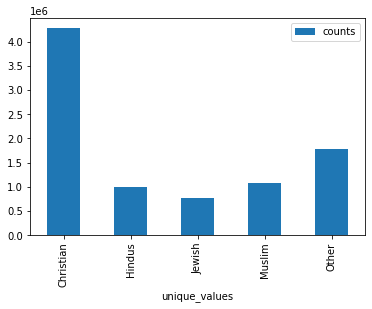

In [203]:
dfallreligions.plot.bar()

In [151]:
dfalloccupations = dfoccupation2015+dfoccupation2016+dfoccupation2017+dfoccupation2018+dfoccupation2019+dfoccupation2020

In [152]:
dfalloccupations

,counts
unique_values,
Arts,12853558
Business,2353098
Military,331377
Other,5453347
Politics,10357155
Religion,190461
Sciences,1338862
Sports,14164586


<AxesSubplot:xlabel='unique_values'>

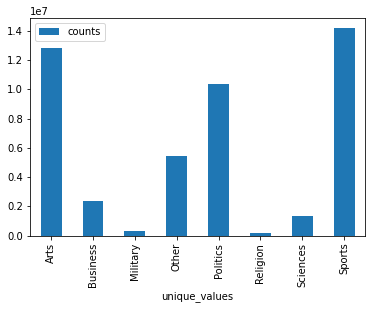

In [204]:
dfalloccupations.plot.bar()

In [153]:
dfallacdeg = dfacademicdegree2015+dfacademicdegree2016+dfacademicdegree2017+dfacademicdegree2018+dfacademicdegree2019+dfacademicdegree2020

In [154]:
dfallacdeg

,counts
unique_values,
Bachelor,1502962
Doctorate,809693
Other,167855
Master,47410


<AxesSubplot:xlabel='unique_values'>

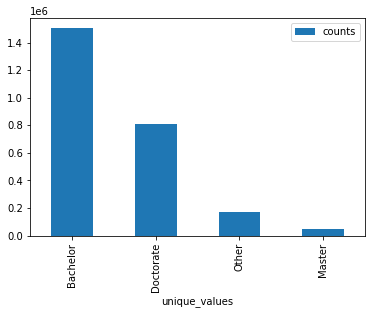

In [201]:
dfallacdeg.plot.bar()

In [199]:
dfallyears = dfyears2015+dfyears2016+dfyears2017+dfyears2018+dfyears2019+dfyears2020
dfallyears.sort_values('counts', ascending = False).head(10)

,counts
unique_values,
1970.0,1270503
1971.0,1185509
1964.0,1146890
1967.0,1142599
1961.0,1138961
1963.0,1090703
1965.0,1038909
1959.0,1016887
1969.0,1015559


<AxesSubplot:xlabel='unique_values'>

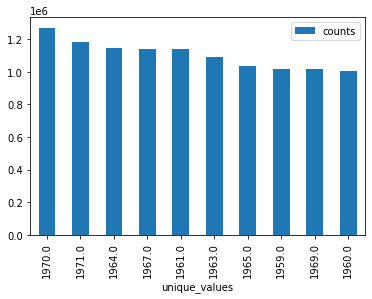

In [205]:
dfallyears.sort_values('counts', ascending = False).head(10).plot.bar()

In [194]:
dfallnationalities = dfnationality2015+dfnationality2016+dfnationality2017+dfnationality2018+dfnationality2019+dfnationality2020

In [200]:
dfallnationalities.sort_values('counts', ascending=False).head(10)

,counts
unique_values,
United States of America,22847425.0
United Kingdom,5013820.0
India,2332895.0
Australia,2101878.0
Canada,2092139.0
New Zealand,636330.0
Germany,584564.0
France,572154.0
Ireland,553562.0


<AxesSubplot:xlabel='unique_values'>

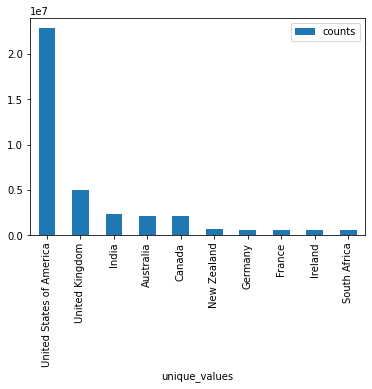

In [206]:
dfallnationalities.sort_values('counts', ascending=False).head(10).plot.bar()

# PART 3: Plots of unique speakers across all years

In [222]:
df2015 = pd.read_csv(r'C:\Users\rapha\OneDrive\Bureau\Master3\ADA\Project\Quotes\UniqueSpeakers\UniqueQuotes2015.csv', compression='gzip')

In [223]:
df2020 = pd.read_csv(r'C:\Users\rapha\OneDrive\Bureau\Master3\ADA\Project\Quotes\UniqueSpeakers\UniqueQuotes2020.csv.gzip', compression='gzip')
df2019 = pd.read_csv(r'C:\Users\rapha\OneDrive\Bureau\Master3\ADA\Project\Quotes\UniqueSpeakers\UniqueQuotes2019.csv.gzip', compression='gzip')
df2018 = pd.read_csv(r'C:\Users\rapha\OneDrive\Bureau\Master3\ADA\Project\Quotes\UniqueSpeakers\UniqueQuotes2018.csv.gzip', compression='gzip')
df2017 = pd.read_csv(r'C:\Users\rapha\OneDrive\Bureau\Master3\ADA\Project\Quotes\UniqueSpeakers\UniqueQuotes2017.csv.gzip', compression='gzip')
df2016 = pd.read_csv(r'C:\Users\rapha\OneDrive\Bureau\Master3\ADA\Project\Quotes\UniqueSpeakers\UniqueQuotes2016.csv.gzip', compression='gzip')
df2015 = pd.read_csv(r'C:\Users\rapha\OneDrive\Bureau\Master3\ADA\Project\Quotes\UniqueSpeakers\UniqueQuotes2015.csv.gzip', compression='gzip')

In [224]:
df2015

,Unnamed: 0,quoteID,qid,sentence_count,._per_sentence,",_per_sentence",!_per_sentence,?_per_sentence,:_per_sentence,;_per_sentence,...,self_ratio,union_ratio,other_ratio,sentiment,date_of_birth,nationality,gender,occupation,academic_degree,religion
0,0,2015-08-31-000271,Q270316,2,1.0,0.500000,0.0,0.0,0.0,0.0,...,-1.0,-0.333333,0.333333,0.140,1947.0,United States of America,Female,Politics,NaN,Christian
1,31,2015-10-04-000115,Q1253,1,0.0,1.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,-0.038,1944.0,South Korea,Male,Politics,NaN,Other
2,399,2015-06-19-016191,Q468374,1,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.351,1956.0,India,Male,Other,NaN,Hindus
3,404,2015-08-31-000309,Q19874690,1,1.0,0.000000,0.0,0.0,0.0,0.0,...,-1.0,-0.333333,0.333333,-0.103,1959.0,Australia,Male,Sciences,NaN,Muslim
4,409,2015-12-10-000332,Q5271548,1,0.0,1.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000,1938.0,United States of America,Female,Arts,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262389,8648164,2015-09-11-023231,Q51132238,1,0.0,1.000000,0.0,0.0,0.0,0.0,...,-1.0,1.000000,-1.000000,-0.403,1995.0,United States of America,Male,Sports,NaN,NaN
262390,8648165,2015-05-20-012152,Q16238893,1,0.0,3.000000,0.0,0.0,0.0,0.0,...,1.0,-1.000000,-1.000000,0.065,1950.0,NaN,Male,Sports,NaN,NaN
262391,8648168,2015-12-23-016983,Q7345910,1,0.0,0.000000,0.0,0.0,0.0,0.0,...,1.0,-1.000000,-1.000000,-0.452,1934.0,Canada,Male,Arts,NaN,Christian
262392,8648180,2015-11-26-015691,Q9190959,1,0.0,3.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,-0.112,1990.0,Sweden,Male,Sports,NaN,NaN


In [228]:
frames = [df2015, df2016, df2017, df2018, df2019, df2020]
alldf = pd.concat(frames)
alldf

,Unnamed: 0,quoteID,qid,sentence_count,._per_sentence,",_per_sentence",!_per_sentence,?_per_sentence,:_per_sentence,;_per_sentence,...,sentiment,date_of_birth,nationality,gender,occupation,academic_degree,religion,quotation,speaker,prob
0,0,2015-08-31-000271,Q270316,2,1.0,0.5,0.0,0.0,0.0,0.0,...,0.140,1947.0,United States of America,Female,Politics,NaN,Christian,NaN,NaN,NaN
1,31,2015-10-04-000115,Q1253,1,0.0,1.0,0.0,0.0,0.0,0.0,...,-0.038,1944.0,South Korea,Male,Politics,NaN,Other,NaN,NaN,NaN
2,399,2015-06-19-016191,Q468374,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.351,1956.0,India,Male,Other,NaN,Hindus,NaN,NaN,NaN
3,404,2015-08-31-000309,Q19874690,1,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.103,1959.0,Australia,Male,Sciences,NaN,Muslim,NaN,NaN,NaN
4,409,2015-12-10-000332,Q5271548,1,0.0,1.0,0.0,0.0,0.0,0.0,...,0.000,1938.0,United States of America,Female,Arts,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128590,2241269,2020-01-15-024813,Q999332,4,0.5,0.0,0.0,0.5,0.0,0.0,...,0.000,1930.0,United States of America,Male,Arts,NaN,NaN,`Here's the thing. What are the two biggest mo...,Buck Henry,0.8814
128591,2241344,2020-01-16-101326,Q999577,1,1.0,4.0,0.0,0.0,0.0,0.0,...,0.182,1971.0,United States of America,Male,Sciences,NaN,NaN,We have all the underlying technology patented...,David Eagleman,0.5474
128592,2241351,2020-02-10-096815,Q999608,4,1.0,1.5,0.0,0.0,0.0,0.0,...,0.069,1971.0,Argentina,Male,Sports,NaN,NaN,We knew coming in that this match was going to...,Gabriel Caballero,0.9516
128593,2241355,2020-02-01-035548,Q999706,2,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.042,1936.0,Ireland,Male,Politics,NaN,NaN,One of our strengths was the church business b...,Vincent Brady,0.7798


In [229]:
alldf.drop_duplicates(subset=['qid'], keep='first', inplace = True)

In [230]:
len(alldf)

451041

Text(0, 0.5, 'Gender frequency')

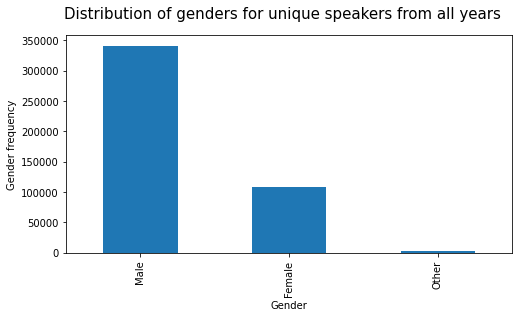

In [231]:
fig, ax = plt.subplots(figsize=(8,4))
ax = alldf['gender'].value_counts().plot.bar(x='gender')
fig.suptitle("Distribution of genders for unique speakers from all years", fontsize = 15)
ax.set_xlabel('Gender')
ax.set_ylabel('Gender frequency')

In [232]:
alldf['gender'].value_counts()

Male      341031
Female    107855
Other       2155
Name: gender, dtype: int64

Text(0, 0.5, 'Religion frequency')

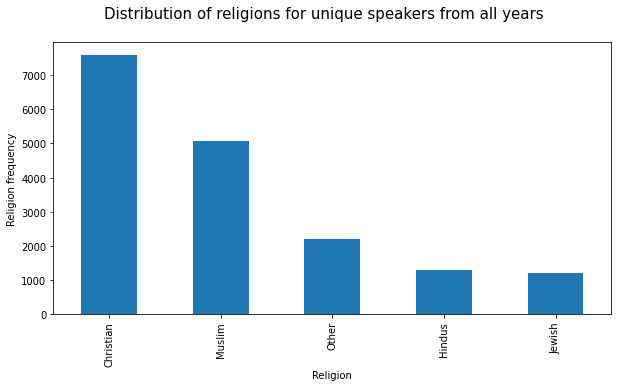

In [233]:
fig, ax = plt.subplots(figsize=(10,5))
ax = alldf['religion'].value_counts().plot.bar(x='religion')
fig.suptitle("Distribution of religions for unique speakers from all years", fontsize = 15)
ax.set_xlabel('Religion')
ax.set_ylabel('Religion frequency')

In [234]:
alldf['religion'].value_counts()

Christian    7588
Muslim       5070
Other        2203
Hindus       1302
Jewish       1192
Name: religion, dtype: int64

Text(0, 0.5, 'Occupation frequency')

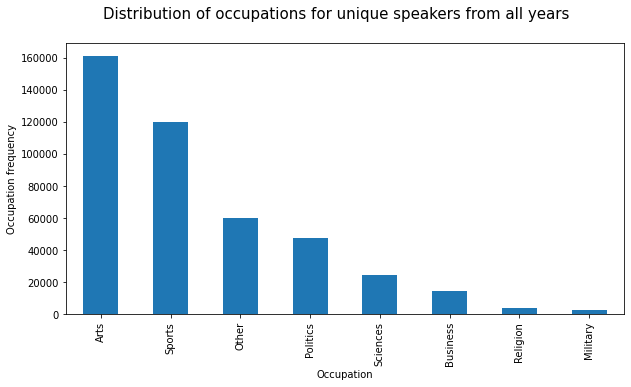

In [235]:
fig, ax = plt.subplots(figsize=(10,5))
ax = alldf['occupation'].value_counts().plot.bar(x='occupation')
fig.suptitle("Distribution of occupations for unique speakers from all years", fontsize = 15)
ax.set_xlabel('Occupation')
ax.set_ylabel('Occupation frequency')

In [236]:
alldf['occupation'].value_counts()

Arts        161239
Sports      119574
Other        60308
Politics     47724
Sciences     24570
Business     14642
Religion      3711
Military      2728
Name: occupation, dtype: int64

Text(0, 0.5, 'Nationality frequency')

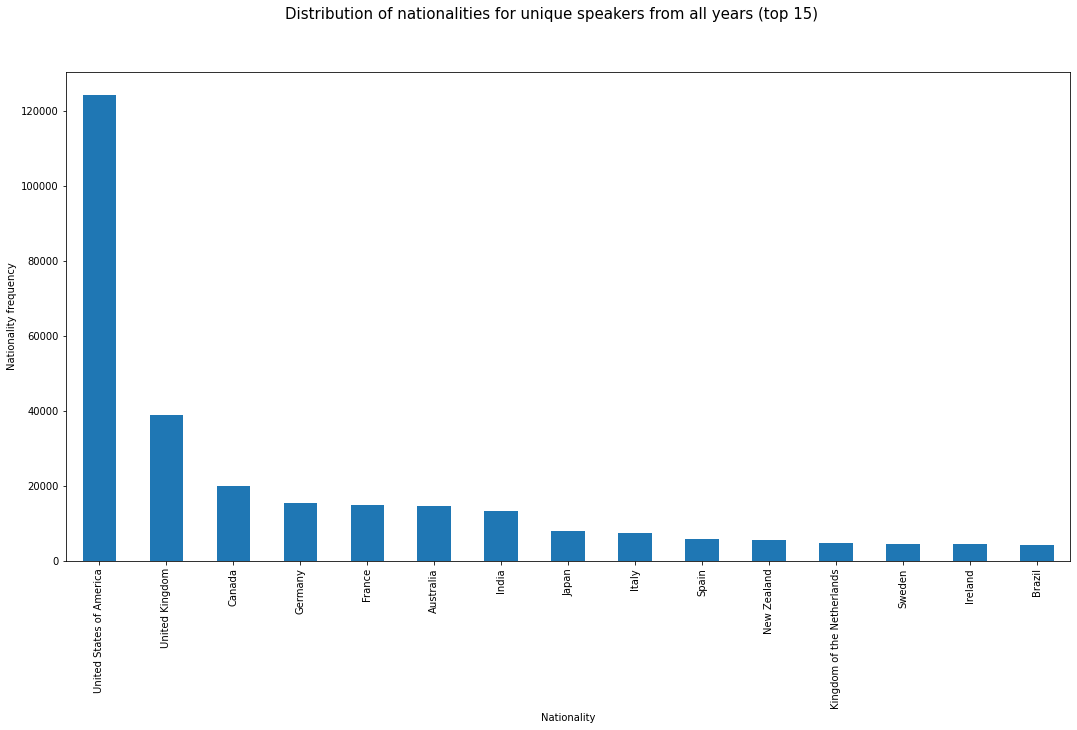

In [237]:
fig, ax = plt.subplots(figsize=(18,9))
ax = alldf['nationality'].value_counts().head(15).plot.bar(x='nationality')
fig.suptitle("Distribution of nationalities for unique speakers from all years (top 15)", fontsize = 15)
ax.set_xlabel('Nationality')
ax.set_ylabel('Nationality frequency')

In [238]:
alldf['nationality'].value_counts().head(15)

United States of America      124203
United Kingdom                 38846
Canada                         19954
Germany                        15532
France                         15006
Australia                      14729
India                          13253
Japan                           7970
Italy                           7580
Spain                           5804
New Zealand                     5591
Kingdom of the Netherlands      4945
Sweden                          4704
Ireland                         4615
Brazil                          4200
Name: nationality, dtype: int64

Text(0, 0.5, 'Academic degree frequency')

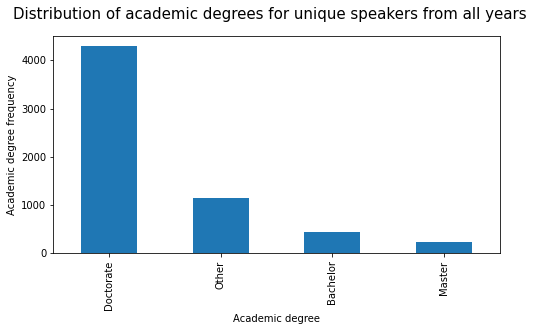

In [239]:
fig, ax = plt.subplots(figsize=(8,4))
ax = alldf['academic_degree'].value_counts().plot.bar(x='academic_degree')
fig.suptitle("Distribution of academic degrees for unique speakers from all years", fontsize = 15)
ax.set_xlabel('Academic degree')
ax.set_ylabel('Academic degree frequency')

In [240]:
alldf['academic_degree'].value_counts()

Doctorate    4287
Other        1149
Bachelor      442
Master        244
Name: academic_degree, dtype: int64

Text(0, 0.5, 'Year frequency')

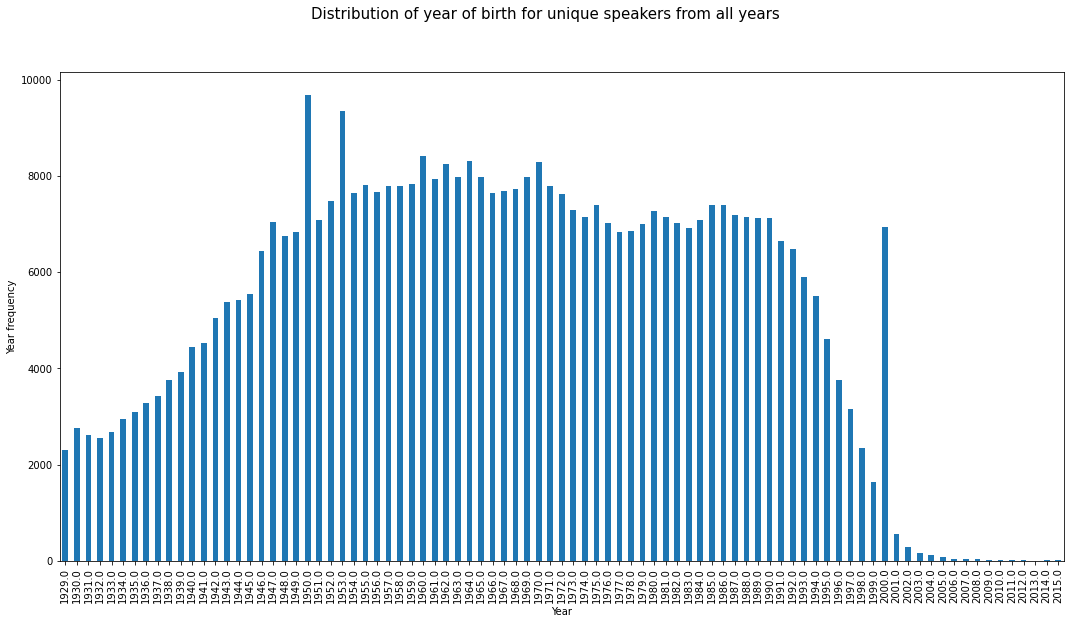

In [241]:
fig, ax = plt.subplots(figsize=(18,9))
ax = alldf['date_of_birth'].sort_values().value_counts(sort=False).plot.bar(x='date_of_birth')
fig.suptitle("Distribution of year of birth for unique speakers from all years", fontsize = 15)
ax.set_xlabel('Year')
ax.set_ylabel('Year frequency')

In [242]:
alldf['date_of_birth'].value_counts().head(15)

1950.0    9681
1953.0    9344
1960.0    8417
1964.0    8300
1970.0    8286
1962.0    8238
1963.0    7971
1965.0    7970
1969.0    7969
1961.0    7927
1959.0    7832
1955.0    7813
1971.0    7796
1958.0    7789
1957.0    7778
Name: date_of_birth, dtype: int64

In [28]:
alldf = alldf[~alldf.index.duplicated(keep='first')]
alldf

,quoteID,quotation,speaker,prob
id,,,,
Q270316,2015-08-31-000271,... a great day for veterans here in Littleton...,Jeanne Shaheen,0.7420
Q1253,2015-10-04-000115,[ Ban ] recalls that hospitals and medical per...,Ban Ki-moon,0.8399
Q468374,2015-06-19-016191,How Indian values and karma can help business ...,Sri Sri Ravi Shankar,0.4169
Q19874690,2015-08-31-000309,[ But ] We were able to network within our com...,Jamal Rifi,0.6109
Q18601741,2015-09-21-030618,How it worked is that they had a keyboard and ...,Richard Burmeister,0.8750
...,...,...,...,...
Q56824721,2020-02-27-003752,An Economic History of Kenya,William Robert Ochieng ',0.6547
Q7803544,2020-01-03-017196,"He has a special spirit, deep experience, and ...",Tim Girvin,0.8159
Q18739817,2020-02-18-007399,"As the city's mayor, the issues that were most...",Daniel M. Pierce,0.5388


In [29]:
alldf.to_csv(r"C:\Users\rapha\OneDrive\Bureau\Master3\ADA\Project\Quotes\UniqueSpeakers\allquotes.csv", header=True, index=True, compression="gzip")

In [52]:
del alldf
del dfmerged